Diagnostic covid (test)<a id="top"></a>
===

Sommaire:
- [1. Démarche basique](#chap1covid)
- [2. Exploratory Data Analysis](#chap2covid)
    - [2.1. Analyse de la forme](#chap21covid)
    - [2.2. Analyse de la fond](#chap22covid)
    - [2.3.Conclusion première analyse](#chap23covid)
    - [2.4. Analyse détaillée](#chap24covid)
    - [2.5. Conclusion analyse détaillée](#chap25covid)
    - [2.6. Hypothèses](#chap26covid)
    - [2.7. Conclusion](#chap27covid)
- [3. Pre traitement](#chap3covid)
- [4. Modelling](#chap4covid)
- [Conclusion](#cclcovid)


[Back to top](#top)

---

# 1. Démarche basique<a id="chap1covid"></a>

1. Définir un objectif **mesurable**:
    > Par exemple, prédire *y* avec 90% d'exactitude, une précision (prévient les faux positifs) de 60% et un recall (préviens les faux négatif) de 80% 
2. Exploration des données : EDA (Exploratory Data Analysis) comprendre au maximum les données et le dataset
    - Analyse de la forme
        - Identifier la target
        - Nombre de lignes / colonnes
        - Nombres de variables discrètes / continues
        - Valeurs manquantes
    - Analyse de fond
        - Visualisation de la target (histogramme / boxplot)
        - Compréhension des variables (On peut regarder sur internet)
        - Visualisation des relations features-target (histogramme / boxplot)
        - Identification des outliers
3. Pre traitement des données : transformer le dataset pour qu'il soit plus propice pour le modèle
    - Train set / Test set
    - Élimination des NaN
    - Encodage
    - Suppression des outliers (pas forcément à la première itération)
    - Feature Selection (supprimer les variables redondantes ou a variance faible)
    - Feature Engineering (combiner des variables / split des variable / polynomial feature + PCA)
    - Feature Scaling (Normaliser les données)
4. Modelling : Choisir un modèle, l'entrainer, l'améliorer
    - Définir une fonction d'évaluation
    - Entrainement de différents modèles
    - Optimisation avec GridSearchCV
    - Analyse des erreurs et retour au preprocessing / EDA si nécessaire
    - Learning curve (toujours à vérifier pour savoir si on manque ou non de données) et prise de décision

In [1]:
# Base lib
import pandas as pd
import numpy as np

# Plots
import matplotlib.pylab as plt
import seaborn as sns

from tools import find_file

In [2]:
data = pd.read_excel(find_file('diagnosis_covid19'))

# Pour afficher plus de lignes
pd.set_option('display.max_row', data.shape[1])

df = data.copy()
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Back to top](#top)

---

# 2. Exploratory Data Analysis<a id="chap2covid"></a>

C'est d'actualité, donc c'est parti, travaillons dessus, travaillons sur un dataset sur le covid, youpi ! :D

Allez on se fait une check list :

- Analyse de la forme
    - [x] Identifier la target : *SARS-Cov-2 exam result*
    - [x] Nombre de lignes / colonnes : *(5644, 111)*
    - [x] Nombres de variables discrètes / continues : *Qte: 74, Qal: 37*
    - [x] Valeurs manquantes : *Beaucoup, seulement 6 colonnes clean et le reste avec entre 76 et 100% de NaN *
- Analyse de fond
    - [x] Visualisation de la target (histogramme / boxplot) : *Environ 10% de cas positif -> classes très deséquilibrées*
    - [x] Compréhension des variables (On peut regarder sur internet) : *Variables quantitatives déjà standardisées, variables qualitatives binaires, le rhinovirus semble élevé à l'inverse de quelques autre comme le Bordetella. Age répartie en catégories pas détaillées*
    - [x] Visualisation des relations features-target (histogramme / boxplot) : peut de double virus, beaucoup de rhinovirus
    - [x] Identification des outliers :
    
[Back to top](#top)

## 2.1. Analyse de la forme<a id="chap21covid"></a>

In [3]:
print('--- Dataset shapes ---\n', df.shape, '\n')

print('--- Dataset type ---')
df.dtypes.value_counts()

--- Dataset shapes ---
 (5644, 111) 

--- Dataset type ---


float64    70
object     37
int64       4
dtype: int64

In [4]:
print('--- Taux de contamination des colonnes ---')
# On créé un dataframe avec pour chaque colonne : leur type, le nombre
# et le poucentage de valeurs manquantes; et le tout trier par nombre
# de valeurs manquantes:
missing = df.isna().sum(axis=0)
pd.DataFrame({
    'dtypes': df.dtypes,
    'sum_na': df.isna().sum(axis=0),
    'na_percent': missing/len(df)
}, index=df.columns).sort_values(by='sum_na')

--- Taux de contamination des colonnes ---


,dtypes,sum_na,na_percent
Patient ID,object,0,0.000000
Patient age quantile,int64,0,0.000000
SARS-Cov-2 exam result,object,0,0.000000
"Patient addmited to regular ward (1=yes, 0=no)",int64,0,0.000000
"Patient addmited to semi-intensive unit (1=yes, 0=no)",int64,0,0.000000
"Patient addmited to intensive care unit (1=yes, 0=no)",int64,0,0.000000
Influenza B,object,4290,0.760099
Respiratory Syncytial Virus,object,4290,0.760099
Influenza A,object,4290,0.760099
Rhinovirus/Enterovirus,object,4292,0.760454


<AxesSubplot:>

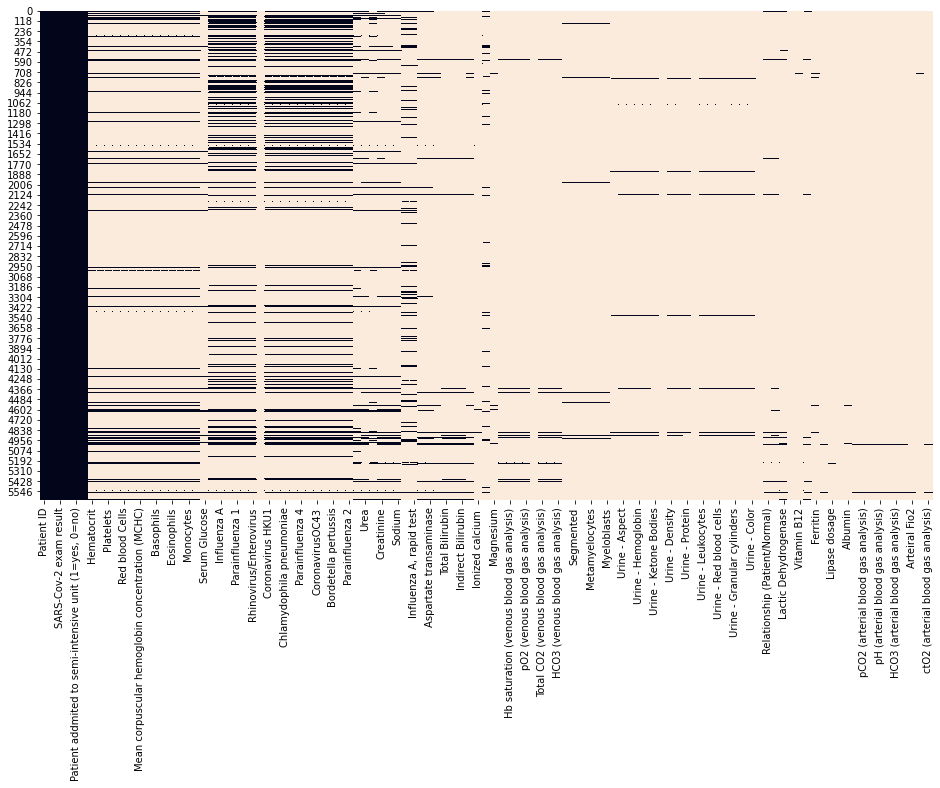

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isna(), cbar=False)

On voit que l'on a plusieurs features avec beaucoup de datas manquante (tout ce qui est blanc). Il est cependant intéressant de voir de belles lignes ressortir. Quand on a ce genre de ligne, il est y a généralement un rapport entre toute. C'est ce qui nous intéresse ! 

On va donc rapidement ne récupérer que les features avec un miminum de valeurs exploitable (au moins 10% de valeurs sans NA).

Je vous explique le tric :
```python
# 1. On va chercher les valeurs nulles :
data.isna()
# 2. On va faire la somme par colonne de ces valeurs nulles :
data.isna().sum(axis=0)
# 3. On récupère les valeurs obtenus :
data.isna().sum(axis=0).values
# 4. On test si les valeurs sont supérieurs à 90% de la taille de notre dataset :
data.isna().sum(axis=0).values > len(data) * .9
# 5. On récupère les clefs des colonnes concernées :
data.columns[data.isna().sum(axis=0).values > len(data) * .9]
# 6. On drop cette liste de colonnes:
```

In [6]:
clean_df = df.drop(columns=df.columns[df.isna().sum(axis=0).values > len(df) * .9])
clean_df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [7]:
print('--- Dataset shapes ---\n', clean_df.shape, '\n')

print('\n--- Unique values by columns ---')
for col in clean_df.columns:
    unique = clean_df[col].unique()
    if len(unique) < 5:
        print(f'- {col :_<60} :', unique)
    else:
        print(f'- {col :-<60} : {len(unique)}')
        
print('\n--- Taux de contamination des colonnes ---')
pd.DataFrame({
    'columns': clean_df.columns,
    'sum_na': clean_df.isna().sum(axis=0),
    'na_percent': clean_df.isna().sum(axis=0)/len(df)
})

--- Dataset shapes ---
 (5644, 39) 


--- Unique values by columns ---
- Patient ID-------------------------------------------------- : 5644
- Patient age quantile---------------------------------------- : 20
- SARS-Cov-2 exam result______________________________________ : ['negative' 'positive']
- Patient addmited to regular ward (1=yes, 0=no)______________ : [0 1]
- Patient addmited to semi-intensive unit (1=yes, 0=no)_______ : [0 1]
- Patient addmited to intensive care unit (1=yes, 0=no)_______ : [0 1]
- Hematocrit-------------------------------------------------- : 177
- Hemoglobin-------------------------------------------------- : 85
- Platelets--------------------------------------------------- : 250
- Mean platelet volume --------------------------------------- : 49
- Red blood Cells--------------------------------------------- : 212
- Lymphocytes------------------------------------------------- : 319
- Mean corpuscular hemoglobin concentration (MCHC)------------ : 58
- Leukocy

,columns,sum_na,na_percent
Patient ID,Patient ID,0,0.000000
Patient age quantile,Patient age quantile,0,0.000000
SARS-Cov-2 exam result,SARS-Cov-2 exam result,0,0.000000
"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to regular ward (1=yes, 0=no)",0,0.000000
"Patient addmited to semi-intensive unit (1=yes, 0=no)",Patient addmited to semi-intensive unit (1=yes...,0,0.000000
"Patient addmited to intensive care unit (1=yes, 0=no)",Patient addmited to intensive care unit (1=yes...,0,0.000000
Hematocrit,Hematocrit,5041,0.893161
Hemoglobin,Hemoglobin,5041,0.893161
Platelets,Platelets,5042,0.893338
Mean platelet volume,Mean platelet volume,5045,0.893870


On sait là dedans que l'ID du patient de nous apporte aucune info. On le supprimera. De plus, *Parainfluenza 2* n'admet qu'une valeur à l'exception de NaN, elle ne sera pas pas utile non plus. On peut voir que l'on a plusieurs variables binaires (présence ou non) et quelques variables numériques. On va donc clean un peut, commencer à préparer des données et commencer à visualiser les données.

Ici, on veut prédire si l'on aura ou non le covid, prenons donc comme target la colonne *SARS-Cov-2 exam result*, et supprimons les features que nous avons jugée inutiles :

In [8]:
y = clean_df[['SARS-Cov-2 exam result']]
clean_df = clean_df.drop(columns=['SARS-Cov-2 exam result', 'Patient ID', 'Parainfluenza 2'])

[Back to top](#top)

## 2.2. Analyse du fond<a id="chap22covid"></a>
Faisons des visualisations, commençons par visualiser la target puis les différentes features numériques :

SARS-Cov-2 exam result
negative                  5086
positive                   558
dtype: int64 

SARS-Cov-2 exam result
negative                  0.901134
positive                  0.098866
dtype: float64 



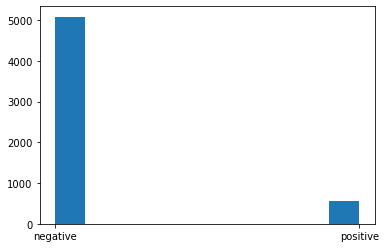

In [9]:
print(y.value_counts(), '\n')
print(y.value_counts(normalize=True), '\n')
plt.hist(y)
plt.show()

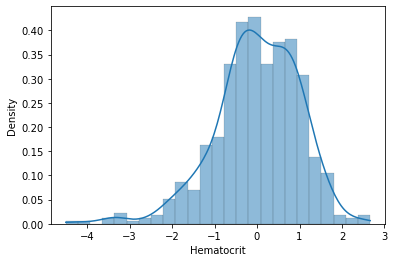

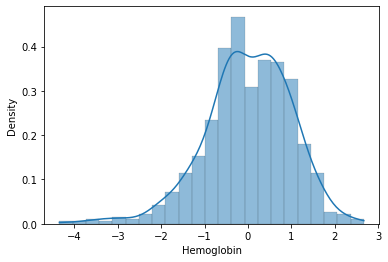

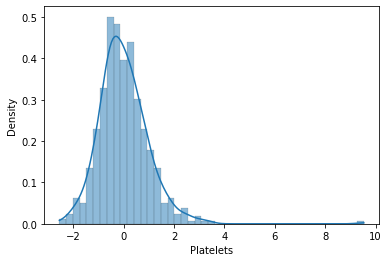

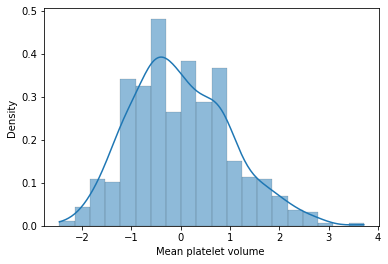

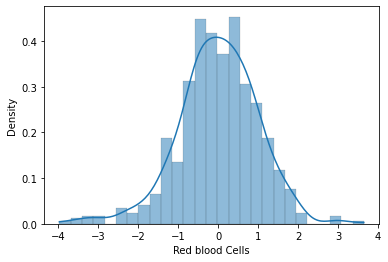

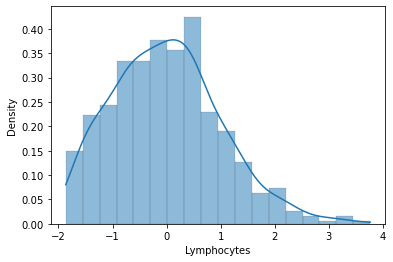

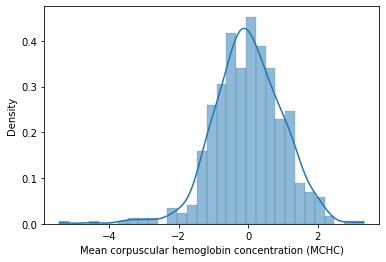

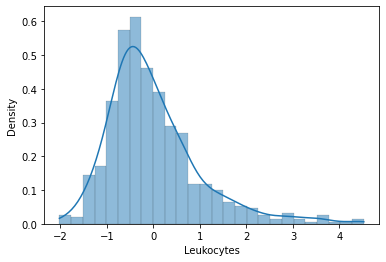

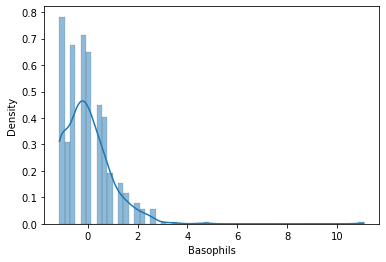

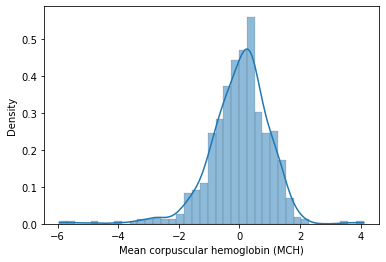

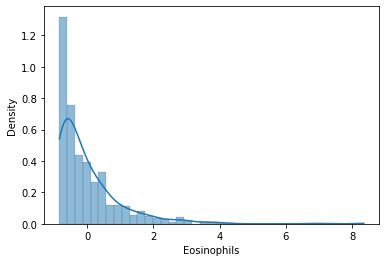

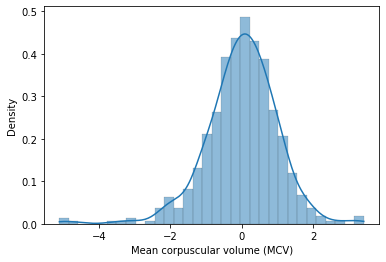

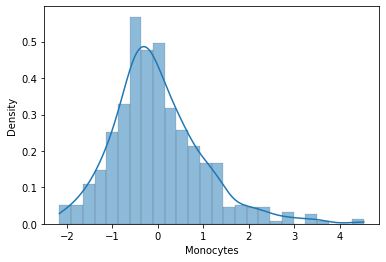

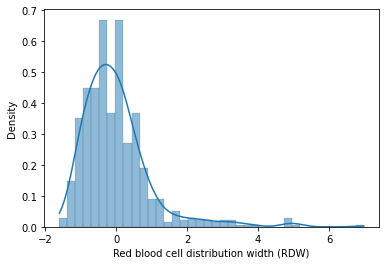

In [10]:
for col in clean_df.select_dtypes('float'):
    plt.figure()
    sns.histplot(clean_df[col], kde=True, stat="density", linewidth=.1)

On peut voir que globalement les variables suivent une normale et surtout, elles sont déjà standardisées (moyenne en 0, écart type de 1)

<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

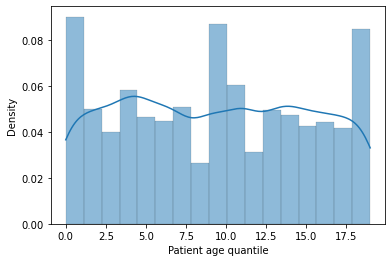

In [11]:
sns.histplot(clean_df['Patient age quantile'], kde=True, stat="density", linewidth=.1)

On n'a que peut d'info sur l'age, quelles sont les bornes ?

Visualisons enfin les différentes variable binaires :

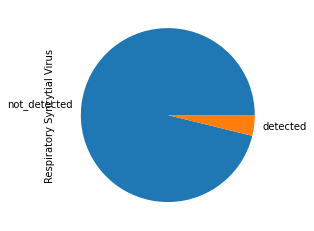

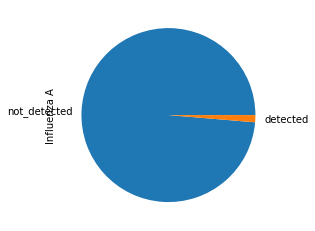

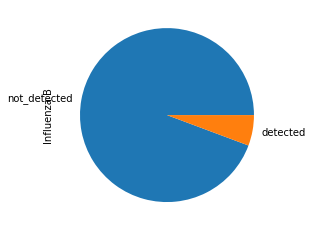

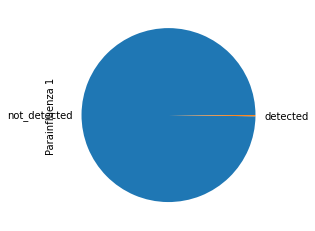

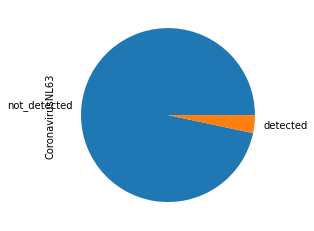

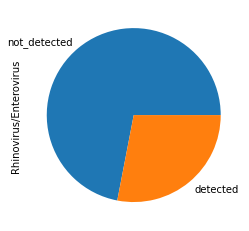

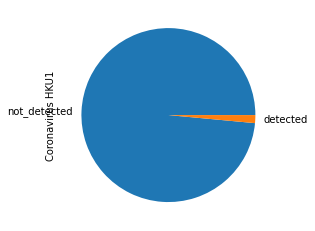

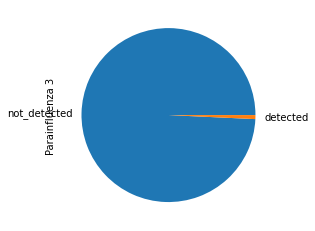

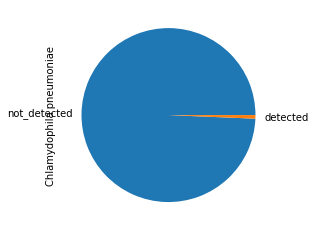

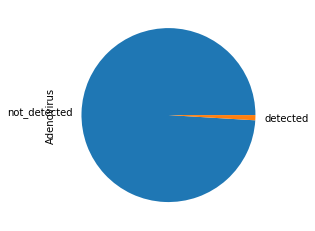

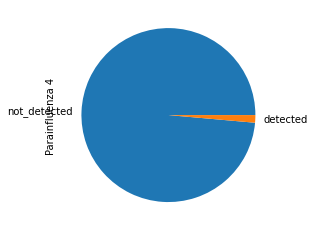

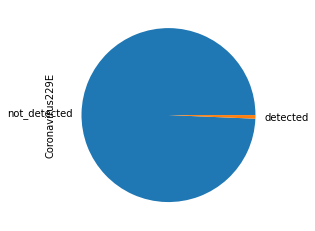

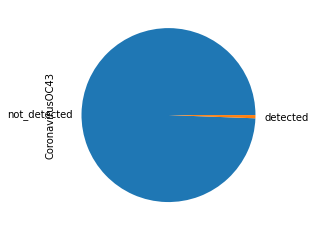

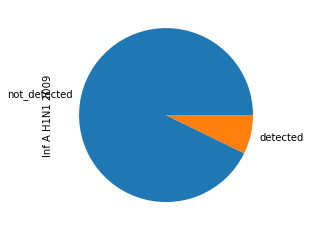

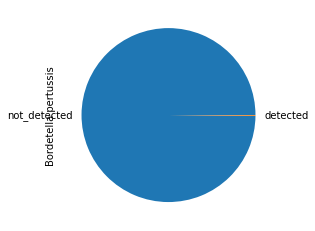

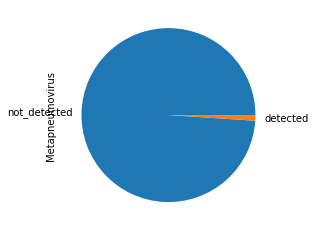

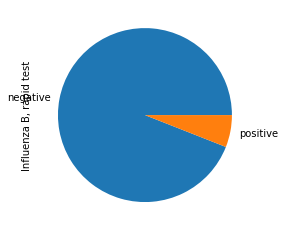

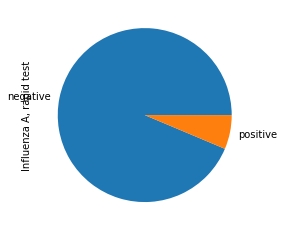

In [12]:
for col in clean_df.select_dtypes('object'):
    plt.figure()
    clean_df.get(col).value_counts().plot.pie()

Analysons maintenant la relation Target / Features. On va créer deux sous ensembles : l'un pour les cas + l'autre pour les cas -

In [13]:
positive = clean_df[y['SARS-Cov-2 exam result'] == 'positive']
negative = clean_df[y['SARS-Cov-2 exam result'] == 'negative']

In [14]:
# Sachant que l'on a pu voir de groupes de data manquantes, analysons les :
missing_rate = missing/len(y)

blood_cols = df.columns[(.88 < missing_rate) & (missing_rate < .9)]
viral_cols = df.columns[(.75 < missing_rate) & (missing_rate < .88)]

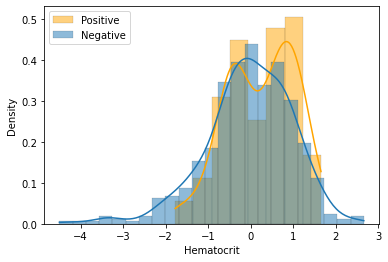

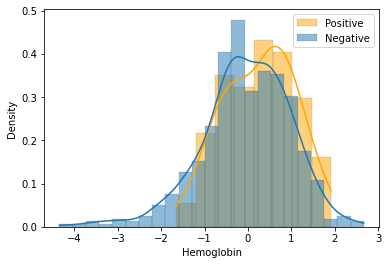

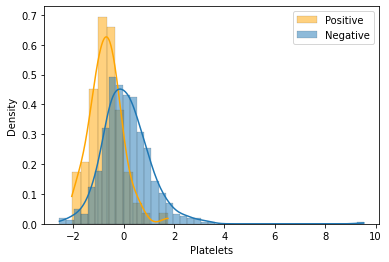

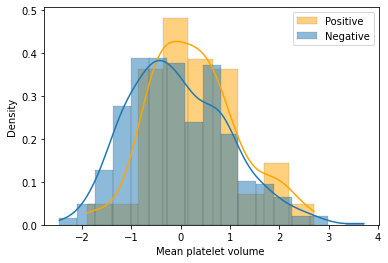

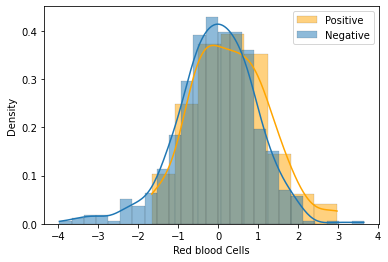

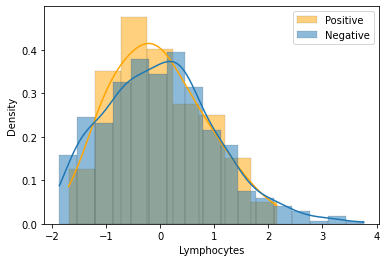

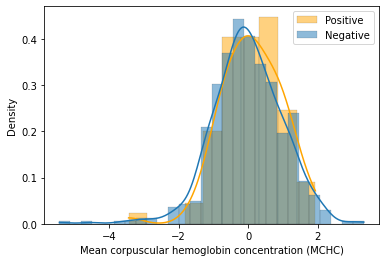

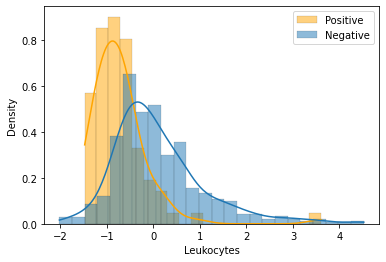

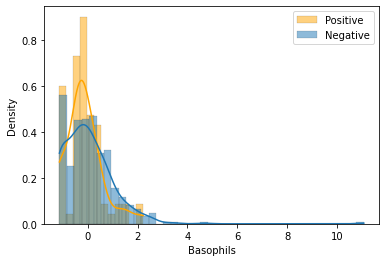

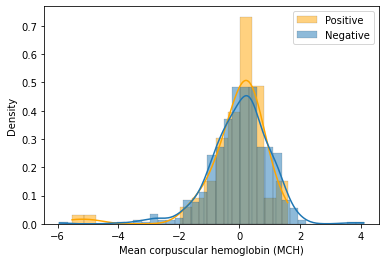

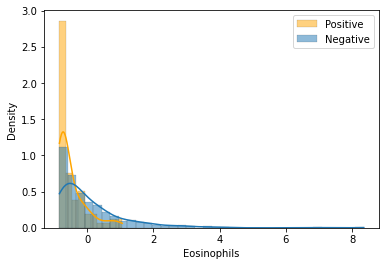

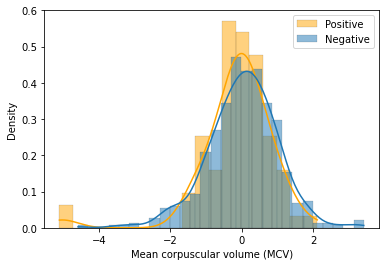

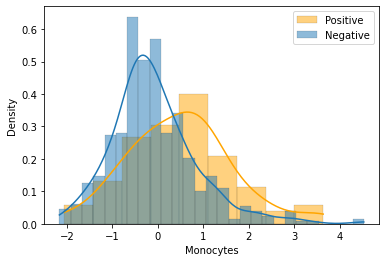

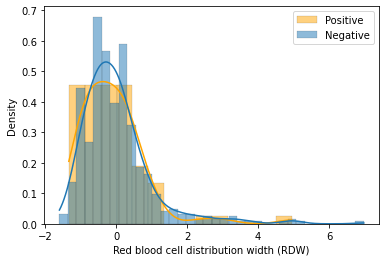

In [15]:
# Relation target / blood
for col in blood_cols:
    plt.figure()
    sns.histplot(positive[col], label='Positive', kde=True, stat="density", linewidth=.1, color='orange')
    sns.histplot(negative[col], label='Negative', kde=True, stat="density", linewidth=.1)
    plt.legend()

On peut voir que les gens positif ont des taux de platelets, de leukocytes et de monocytes différent des non contaminés

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

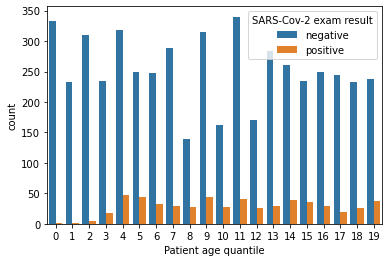

In [16]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

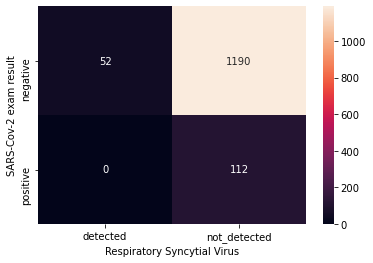

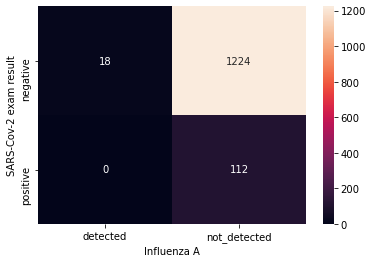

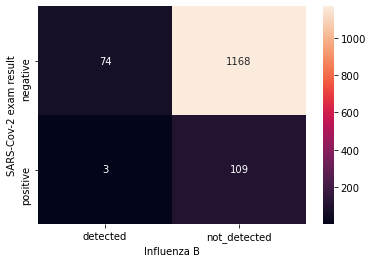

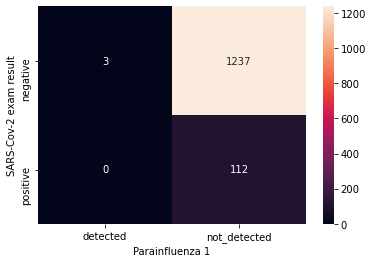

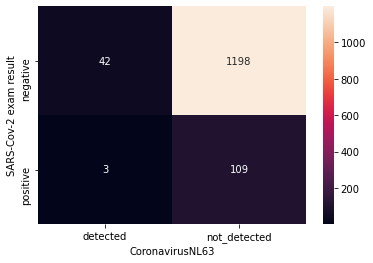

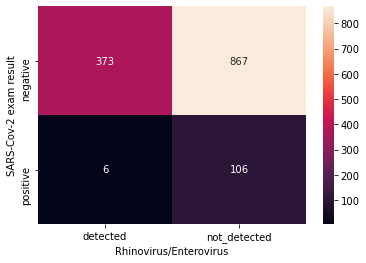

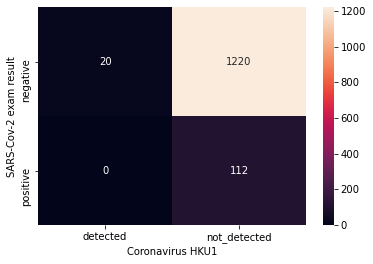

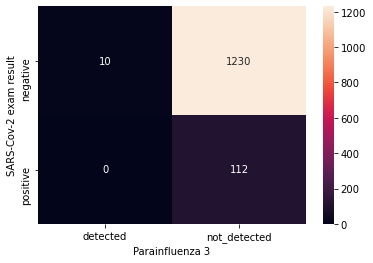

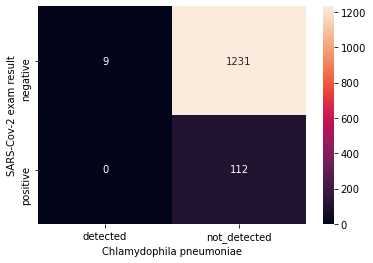

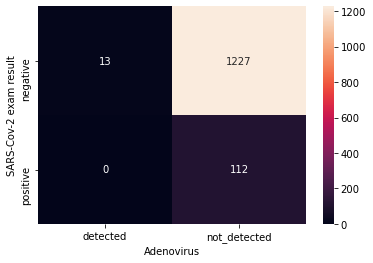

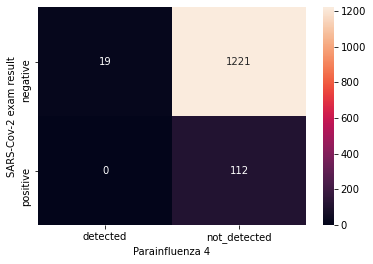

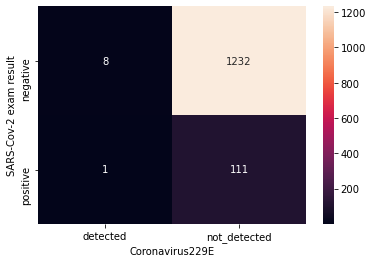

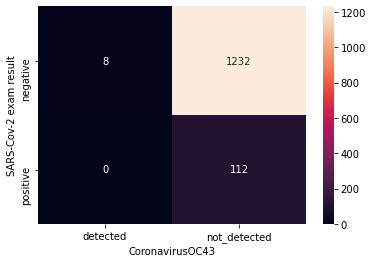

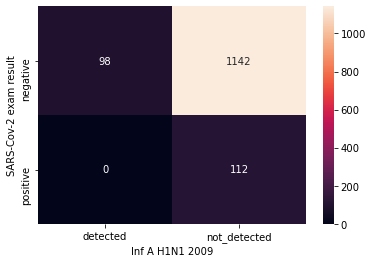

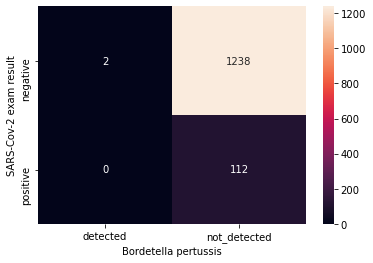

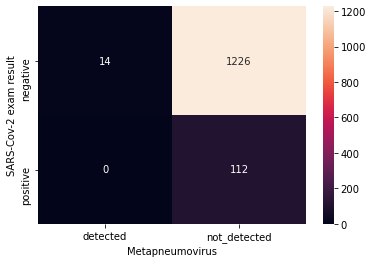

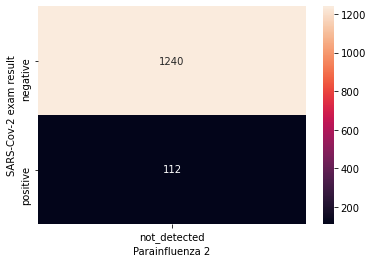

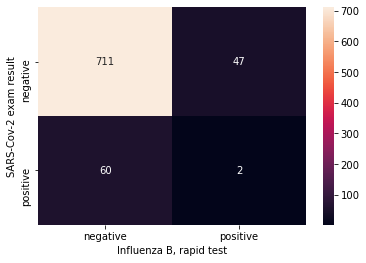

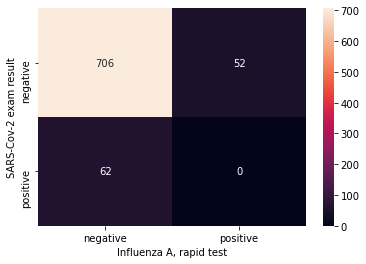

In [17]:
for col in viral_cols:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

[Back to top](#top)

## 2.3. CONCLUSION Première analyse<a id="chap23covid"></a>

- Notre target est : SARS-Cov-2 exam result
- Notre dataset a : 
    - 5644 lignes, 111 colonnes
    - 70 variable qualitatives et 37+4 variables quantitatives
    - beaucoup de valeurs manquante (majorité des variables avec plus de 90% de NaN)
    - 2 groupe de données :
        - l'un avec 76% de valeurs manquantes : test viral
        - l'un avec 89% de valeurs manquantes : test sanguin
        
- Analyse de fond :
    - Il y a un peu moins de 10% de positifs (558/5644)
    - Variables :
        - Les variables quantitatives ont été standardisées
        - L'age est en quantile mais on a peu d'infos sur les différentes catégories
        - Les variables qualitatives sont des binaires.
        - Rhinovirus semble élevé, plus d'occurences que les autres maladies
    - Relation Variables / Targets :
        - target / test sanguin : Placelet, Leukocytes et Monocyte semblent liés à la target : à tester
        - target / age : classe d'age petite (plus jeunes ?) semblent moins touchés
        - target / viral : Rhinovirus semble élevé : à tester
        
Il y a peu de variable intéressantes, il est cependant intéressant de tester cela et de voir si oui ou non il est possible de faire un modèle efficace et pourquoi.


[Back to top](#top)

## 2.4. Analyse détaillée<a id="chap24covid"></a>
- Analyse des relations variables/variables
- Analyse des NaN
- Test d'hypothèses (H0) :
    - Individus atteints du covid ont plus de Leukocytes / Monocytes / Placets, de manière significative (test de student)    

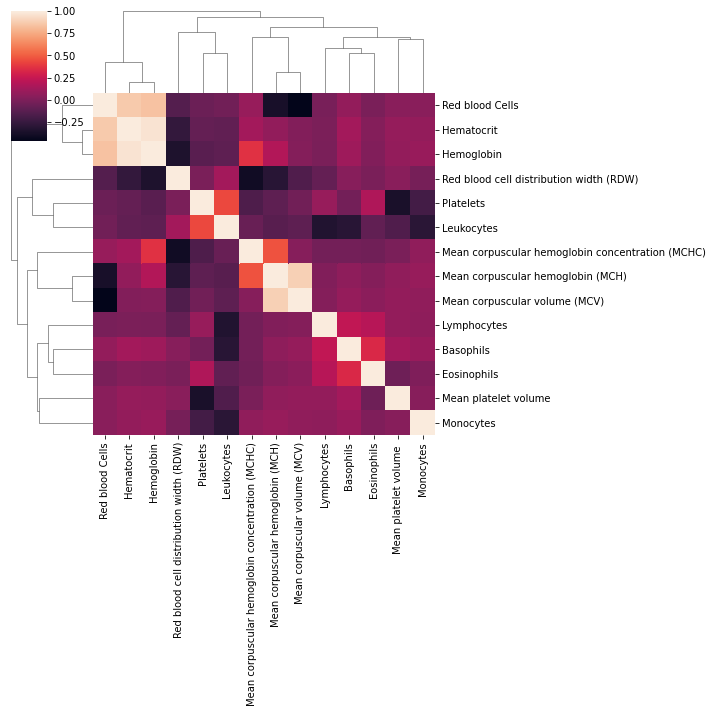

In [18]:
sns.clustermap(clean_df[blood_cols].corr())

On peut voir que certaines variables sont très corrélées (+0.9 de coeficient), comme :
- l'hematocrit et l'hemoglobin
- MCH et MCV

à surveiller

<ipython-input-19-219738acf330>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

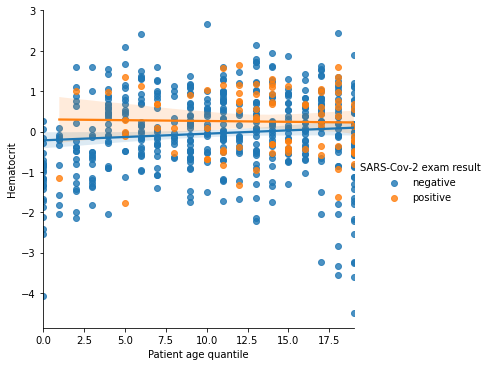

<Figure size 432x288 with 0 Axes>

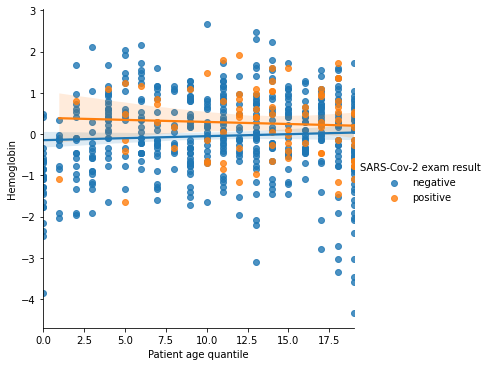

<Figure size 432x288 with 0 Axes>

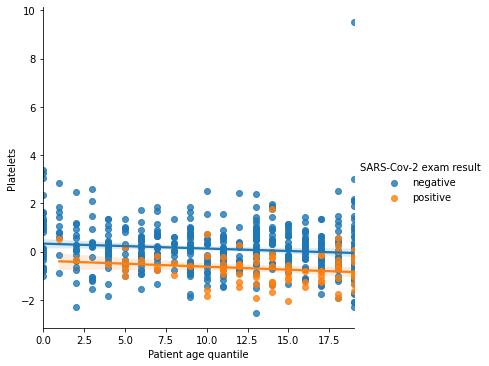

<Figure size 432x288 with 0 Axes>

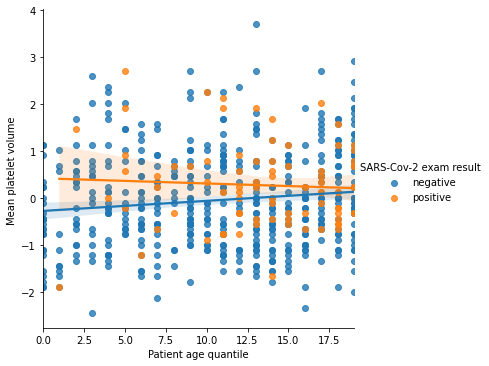

<Figure size 432x288 with 0 Axes>

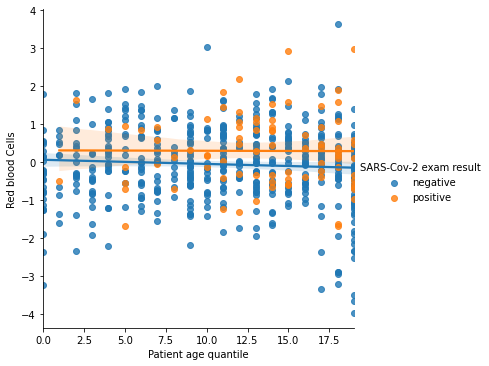

<Figure size 432x288 with 0 Axes>

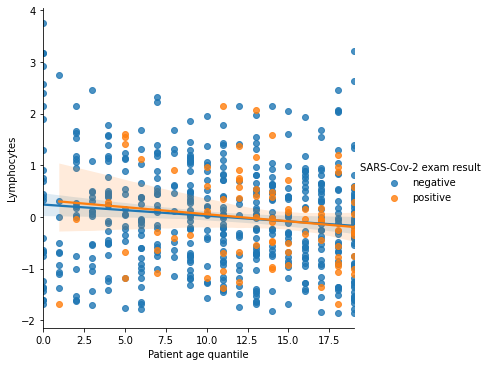

<Figure size 432x288 with 0 Axes>

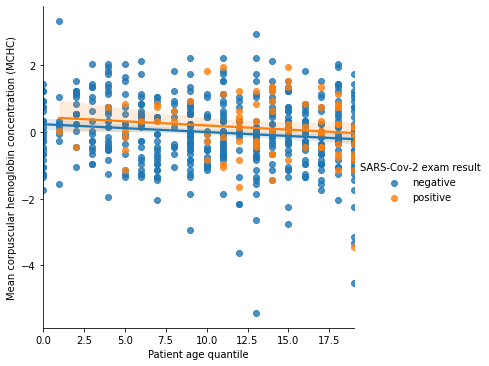

<Figure size 432x288 with 0 Axes>

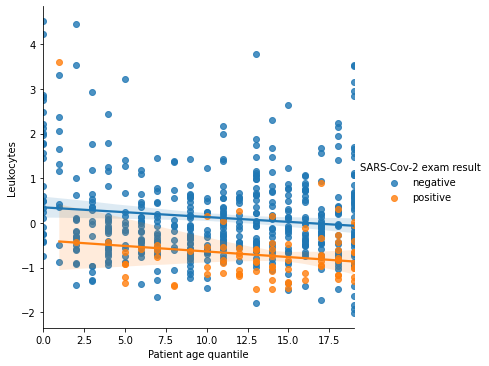

<Figure size 432x288 with 0 Axes>

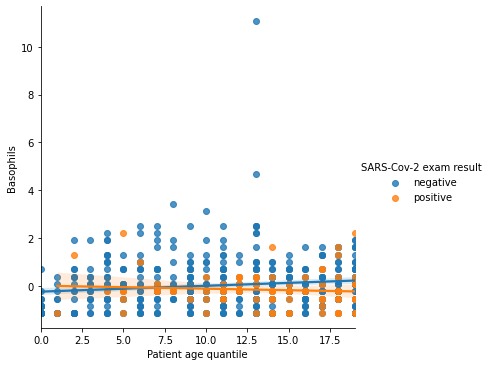

<Figure size 432x288 with 0 Axes>

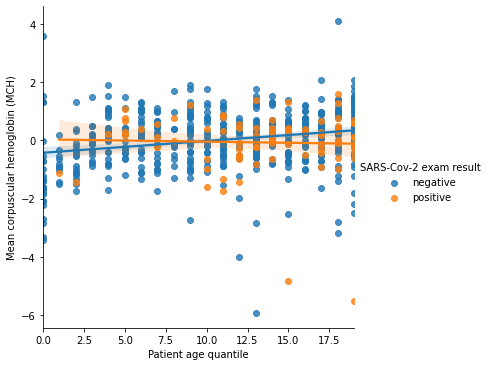

<Figure size 432x288 with 0 Axes>

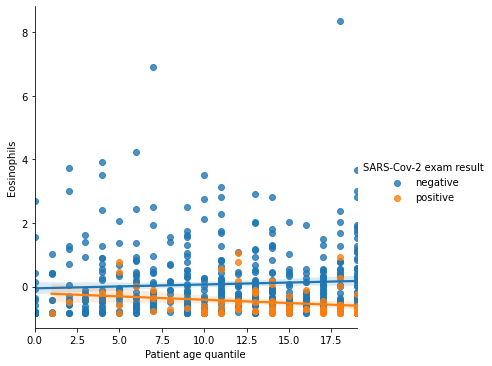

<Figure size 432x288 with 0 Axes>

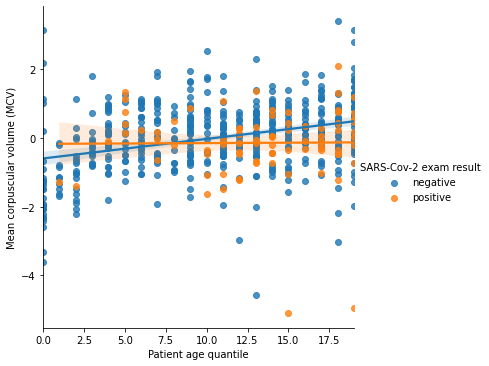

<Figure size 432x288 with 0 Axes>

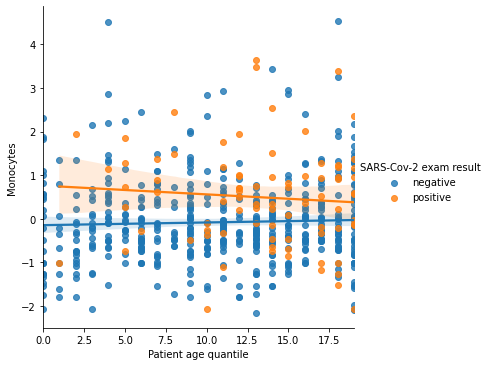

<Figure size 432x288 with 0 Axes>

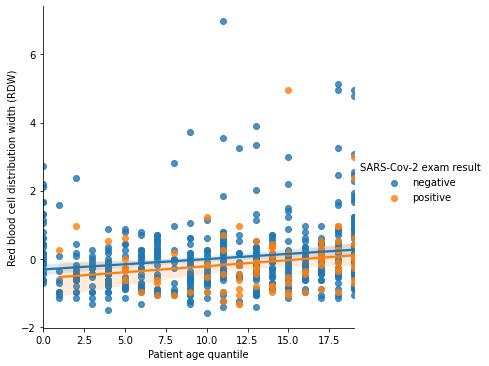

In [19]:
for col in blood_cols:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [20]:
clean_df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

Bon, on oberve peu de correlation age / features... Dommage, continuons en regardant le rapid test Influenza A qui est assez étrange sur la toute première heatmap que nous avions faite :

In [21]:
pd.crosstab(clean_df['Influenza A'], clean_df['Influenza A, rapid test'])

"Influenza A, rapid test",negative,positive
Influenza A,,
detected,2,4
not_detected,245,15


Analysons les taux sanguins lorsqu'un patient est malade :

<AxesSubplot:>

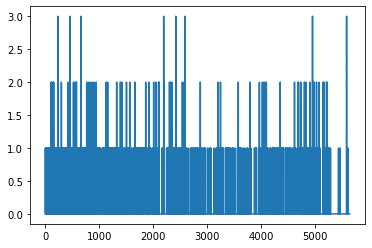

In [22]:
# Nombre maladie par patient :
np.sum(df[viral_cols[:-2]] == 'detected', axis=1).plot()

In [23]:
clean_df['est malade'] = np.sum(df[viral_cols[:-2]] == 'detected', axis=1) > 0
malade = clean_df[clean_df['est malade'] == True]
non_malade = clean_df[clean_df['est malade'] == False]

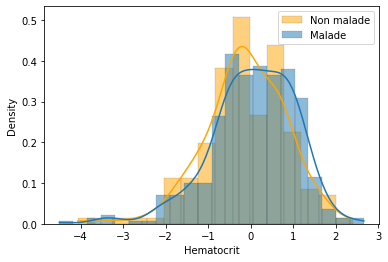

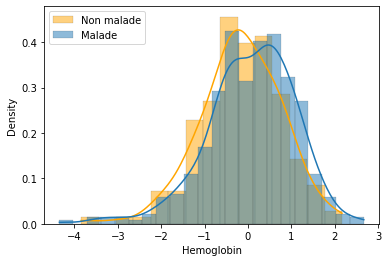

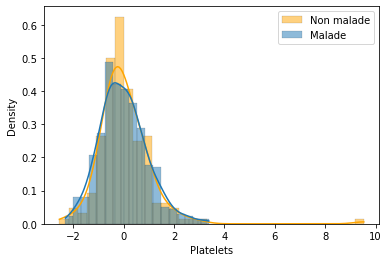

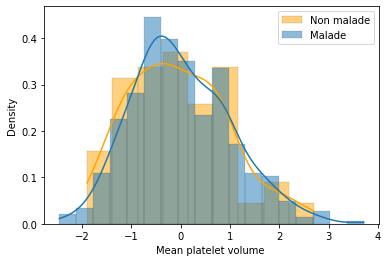

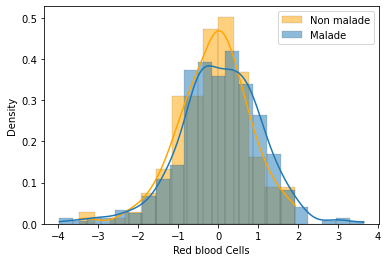

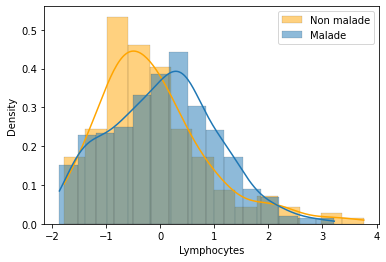

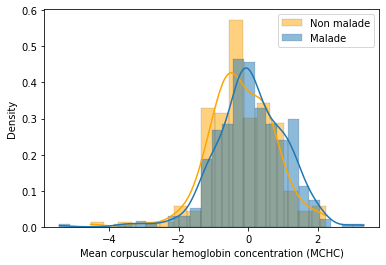

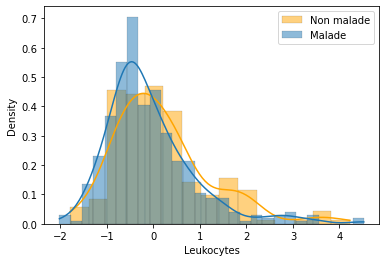

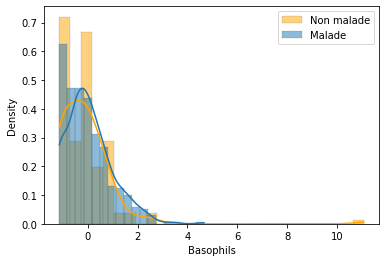

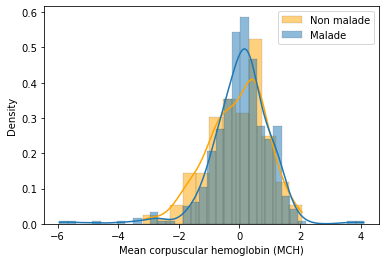

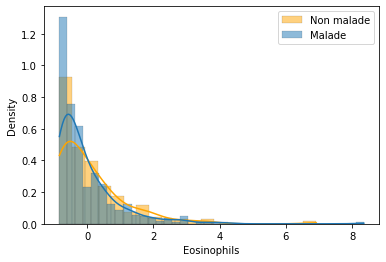

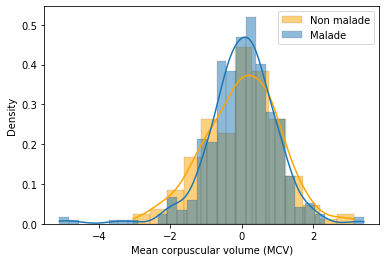

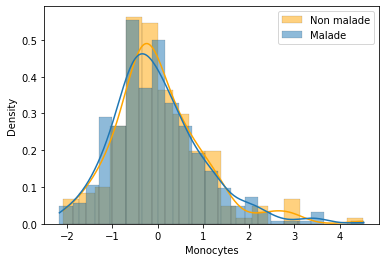

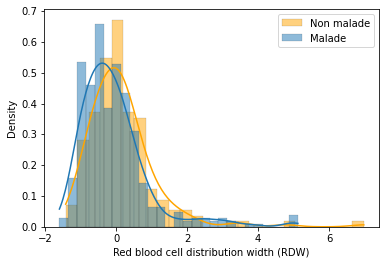

In [24]:
# Relation target / blood
for col in blood_cols:
    plt.figure()
    sns.histplot(malade[col], label='Non malade', kde=True, stat="density", linewidth=.1, color='orange')
    sns.histplot(non_malade[col], label='Malade', kde=True, stat="density", linewidth=.1)
    plt.legend()

Il est intéressant de noter que les Platelets sont égaux alors qu'avant (avec le covid) on voyait une différence. A l'inverse, les Lymphocytes ont une différences entre malade pas malade, alors qu'il n'y en avait pas pour le covid.

In [25]:
def hospitalise(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'Regular'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'Semi-Intensif'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'Intensif'
    else:
        return 'None'
    
clean_df['Statut'] = clean_df.apply(hospitalise, axis=1)

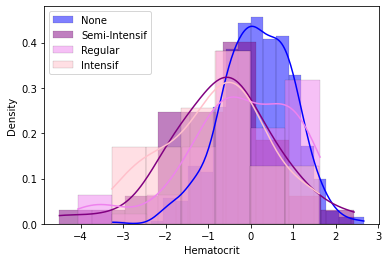

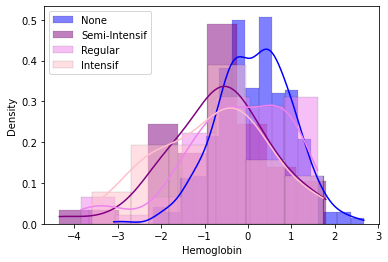

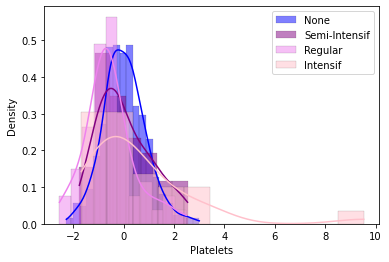

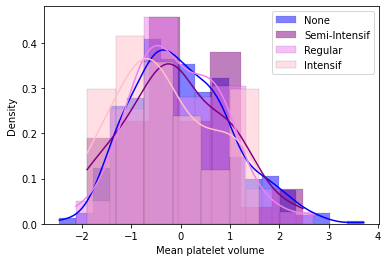

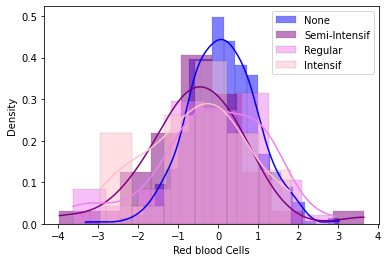

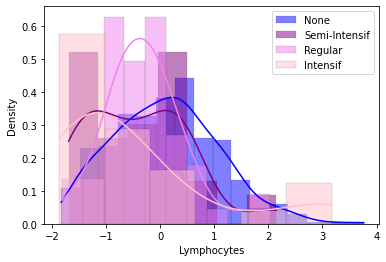

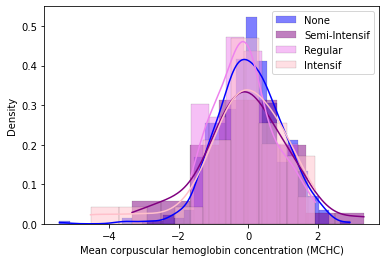

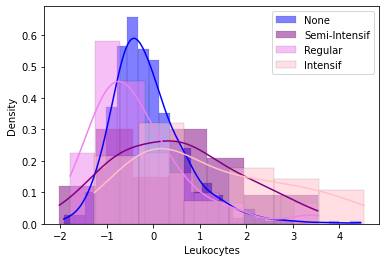

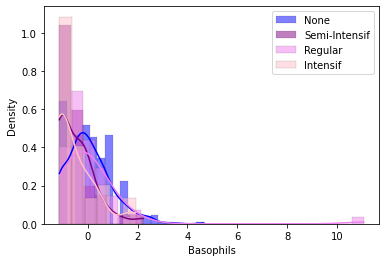

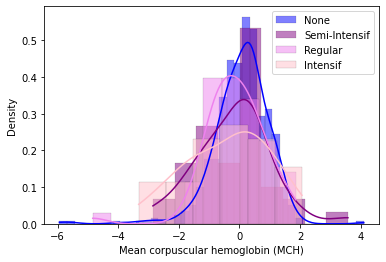

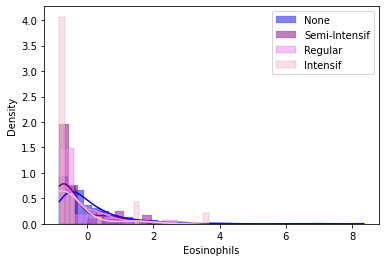

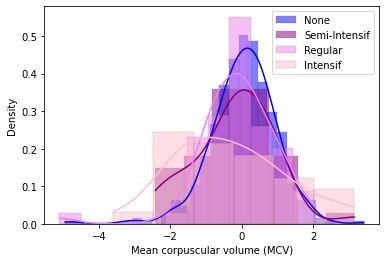

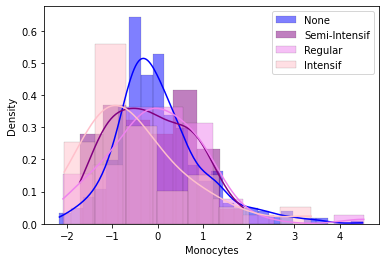

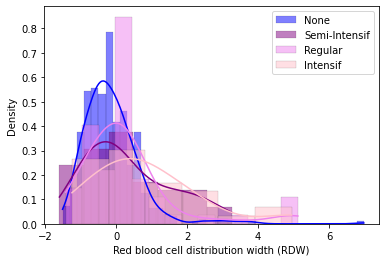

In [26]:
color = {
    1 : 'blue',
    2 : 'purple',
    3 : 'violet',
    4 : 'pink'
}
for col in blood_cols:
    plt.figure()
    i = 0
    for cat in clean_df.Statut.unique():
        i += 1
        sns.histplot(clean_df[clean_df.Statut == cat][col], label=cat, kde=True, 
                     stat="density", linewidth=.1, color=color.get(i))
    plt.legend()

<AxesSubplot:>

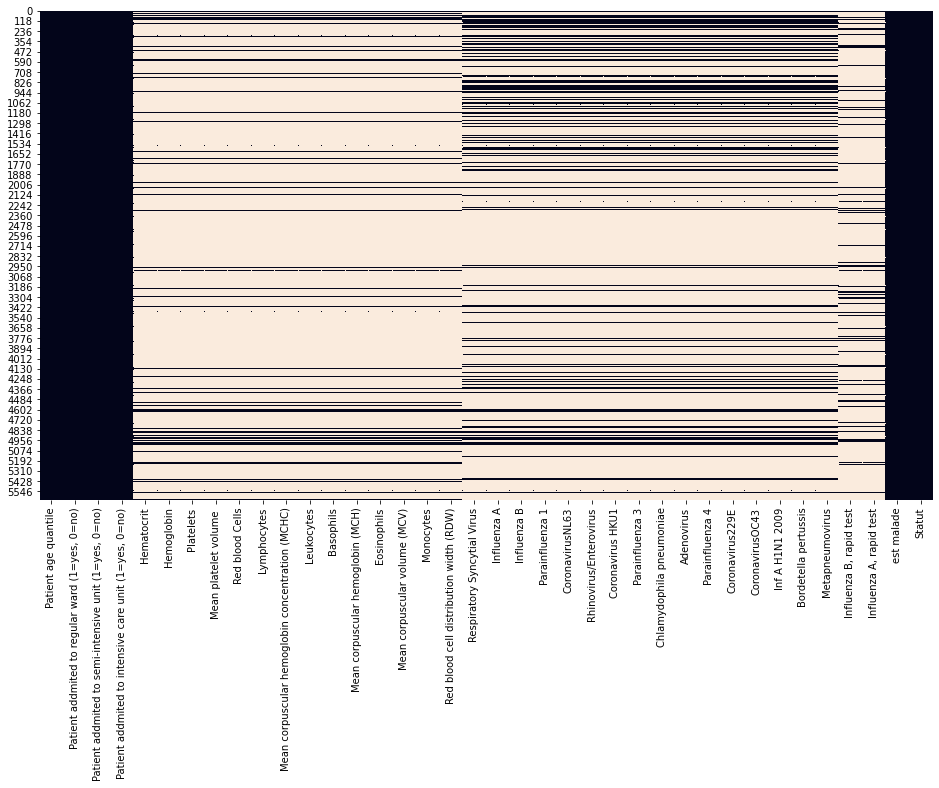

In [27]:
plt.figure(figsize=(16,9))
sns.heatmap(clean_df.isna(), cbar=False)

In [28]:
# Si on ne travaille qu'avec blood
clean_df[blood_cols].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [29]:
df[viral_cols].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [30]:
# Si on nettoie tout, on n'aura plus que :
clean_df.dropna().count()

Patient age quantile                                     99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)                            99
Monocytes                               

In [31]:
df_test = df[blood_cols]
df_test['covid'] = df['SARS-Cov-2 exam result']
df_test.dropna().covid.value_counts(normalize=True)

<ipython-input-31-e2f008d8fbf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['covid'] = df['SARS-Cov-2 exam result']


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

In [32]:
df_test = df[viral_cols]
df_test['covid'] = df['SARS-Cov-2 exam result']
df_test.dropna().covid.value_counts(normalize=True)

<ipython-input-32-e3705bcd0384>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['covid'] = df['SARS-Cov-2 exam result']


negative    0.928302
positive    0.071698
Name: covid, dtype: float64

[Back to top](#top)

## 2.5. CONCLUSION Analyse détaillée <a id="chap25covid"></a>
- Certaines variable concernant le sang sont très corrélées
- Très faible relation taux sanguin et age
- Taux sanguin entre malade du covid et les autres sont un peu différents
- Relation hospitalisation / blood pourrait etre intéressante pour prédire dans quel service diriger un patient
- Analyse valeurs manquates (NaN) :
    - viral : 1352 - 1354
    - blood : 599 - 603
    - viral & blood : 99
    
    
[Back to top](#top)

## 2.6. Hypothèses <a id="chap26covid"></a>
Test d'hypothèses (H0) à tester :
- Individus atteints du covid ont plus de Leukocytes / Monocytes / Placets, de manière significative (test de student)
> H0 : Les taux moyens sont ÉGAUX chez les individus positif et négatif
> On va tester avec un test de student
- Individus atteints d'une autre maladie ont des taux différents
> H0 : Les taux moyens sont ÉGAUX chez les individus positif au covid et les autres malades
> On va tester avec un test de student

Pour le test de student, on va chercher à contre dire notre hypothèse h0, si notre seuil alpha (de 2% à 5%) est supérieur à une valeur p alors on peut rejeter l'hypothèse, sinon on ne pourra pas réfuter l'hypothèse.

In [33]:
from scipy.stats import ttest_ind

In [34]:
# Normalement, pour un test de student, il est préférable d'avoir
# des échantillons équilibrés, ce que l'on a pas. On va donc 
# échantilloner les négatifs
print(positive.shape)
print(negative.shape)

(558, 36)
(5086, 36)


In [35]:
random_negative_sample = negative.sample(positive.shape[0])
random_negative_sample.shape

(558, 36)

In [36]:
def t_test(col, alpha=.02):
    stat, p = ttest_ind(random_negative_sample[col].dropna(), positive[col].dropna())
    if p < alpha:
        return 'H0 rejetée'
    else:
        return 0
    
for col in blood_cols:
    print(f'{col : <60} {t_test(col)}')

Hematocrit                                                   0
Hemoglobin                                                   0
Platelets                                                    H0 rejetée
Mean platelet volume                                         0
Red blood Cells                                              0
Lymphocytes                                                  0
Mean corpuscular hemoglobin concentration (MCHC)             0
Leukocytes                                                   H0 rejetée
Basophils                                                    0
Mean corpuscular hemoglobin (MCH)                            0
Eosinophils                                                  H0 rejetée
Mean corpuscular volume (MCV)                                0
Monocytes                                                    H0 rejetée
Red blood cell distribution width (RDW)                      0


[Back to top](#top)

## 2.7. Conclusion <a id="chap27covid"></a>

- Individus atteints du covid ont plus de Leukocytes / Monocytes / Placets, de manière significative (test de student)
> H0 : Les taux moyens sont ÉGAUX chez les individus positif et négatif
> L'hypothèse est donc rejetée. C'est donc intéressant, nous pourrons nous baser là dessus pour nos études.

[Back to top](#top)

---

# 3. Pre traitement<a id="chap3covid"></a>

Le but ici est de traiter les données afin de faciliter le travail du modèle et d'améliorer ses performances. On peut
- Encoder les données
- Nettoyer les NaN
- Normaliser les données
- Nettoyer les Outliers
- Faire de la feature selection
- Faire de la feature extraction

Alors que faire pour ne pas s'y perdre ?

Concentrons nous sur l'étape principale : *Mettre les données dans un format propice au ML* :
- Train / Test set
- Encodage
- Nettoyage des NaN

Ici on créera un premier modèle simple que l'on évaluera et diagnostiquer.

Ensuite on améliorera la qualité du modèle, est-il en under / over fitting ? On adapte et on reboucle.

In [37]:
# Repartons sur des bases "pures"
df = data.copy()

target = 'SARS-Cov-2 exam result'

In [38]:
# On recréé nos variables intéressantes :
missing_rate = df.isna().sum() / df.shape[0]

blood_cols = list(df.columns[(.88 < missing_rate) & (missing_rate < .90)])
viral_cols = list(df.columns[(.75 < missing_rate) & (missing_rate < .80)])

# On tri rapidement notre dataframe
key_columns = ['Patient age quantile', target]
df_1 = df[key_columns + blood_cols + viral_cols]
df_1.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


### Train / Test set
Maintenant que l'on a des bases saines, faisons le train et le test set :

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
trainset, testset = train_test_split(df_1, test_size=.2)

In [41]:
# On vérifie que l'on n'a pas un déséquilibre de représentation des données :
{
    'Trainset': trainset[target].value_counts(normalize=True), 
    'Testset' : testset[target].value_counts(normalize=True)
}

{'Trainset': negative    0.90299
 positive    0.09701
 Name: SARS-Cov-2 exam result, dtype: float64,
 'Testset': negative    0.893711
 positive    0.106289
 Name: SARS-Cov-2 exam result, dtype: float64}

### Encodage
Occupons nous de l'Encodage

In [42]:
# On encode le texte en booléens
def encodage(df):
    code = {
        'positive': 1,
        'negative': 0,
        'detected': 1,
        'not_detected': 0
    }

    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)
        
    return df

### Imputation 

In [43]:
# Juste avant l'imputation, on va préparer cette foncton pour la suite
def feature_engineering(df):
    # Pour l'instant, ne fait rien
    return df 

In [44]:
def imputation(df):
    return df.dropna(axis=0)

In [45]:
def preprocessing(df):
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop(target, axis=1)
    y = df[target]
    
    print(y.value_counts())
    
    return X, y

In [46]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

0    259
1     42
Name: SARS-Cov-2 exam result, dtype: int64
0    53
1     8
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)
<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


### Modelisation

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier(random_state=0)

### Procedure d'évaluation

In [49]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report  # Pour analyser les faux positifs et negatifs
from sklearn.model_selection import learning_curve  # Pour voir si on est en over / under fitting

In [50]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [51]:
evaluation(model)

[[51  2]
 [ 5  3]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        53
           1       0.60      0.38      0.46         8

    accuracy                           0.89        61
   macro avg       0.76      0.67      0.70        61
weighted avg       0.87      0.89      0.87        61



Franchement pas mal, c'est plutôt un très bon score pour un premier jet ! Améliorons notre fonction d'évaluation pour regarder la learning curve et voir si on est en under ou over fitting :

[[51  2]
 [ 5  3]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        53
           1       0.60      0.38      0.46         8

    accuracy                           0.89        61
   macro avg       0.76      0.67      0.70        61
weighted avg       0.87      0.89      0.87        61



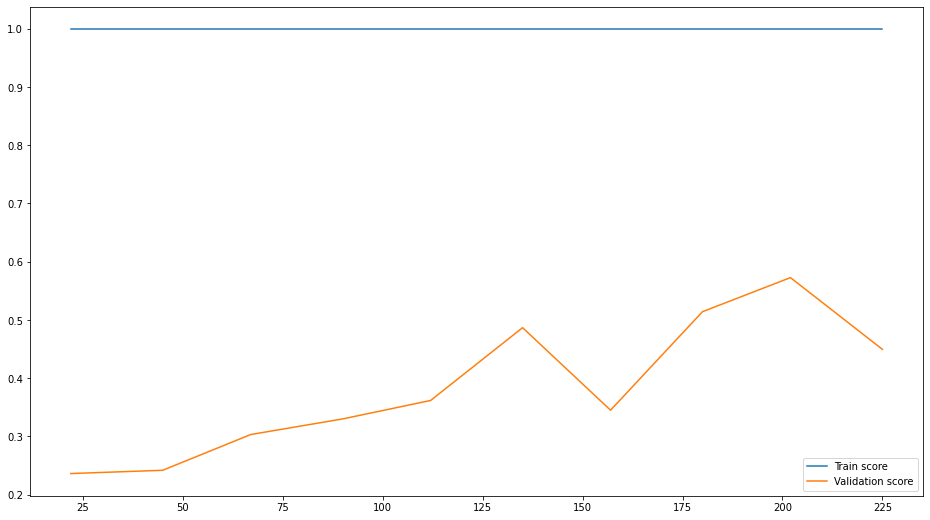

In [52]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,
                                              train_sizes=np.linspace(.1, 1, 10),
                                              scoring='f1')
    
    plt.figure(figsize=(16, 9))
    plt.plot(N, train_score.mean(axis=1), label='Train score')
    plt.plot(N, val_score.mean(axis=1), label='Validation score')
    plt.legend()
    plt.show()
    
evaluation(model)

On voit que l'on est en overfitting, en effet, il est très bon sur le jeu d'entrainement mais mauvais sur la validation ! Essayons de lutter face à cet overfitting, donnons plus de données. On va changer l'imputation

In [53]:
# Testons avec un fillna plutot qu'un dropna
def imputation(df):
    return df.fillna(-1)

0    4077
1     438
Name: SARS-Cov-2 exam result, dtype: int64
0    1009
1     120
Name: SARS-Cov-2 exam result, dtype: int64
[[996  13]
 [114   6]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1009
           1       0.32      0.05      0.09       120

    accuracy                           0.89      1129
   macro avg       0.61      0.52      0.51      1129
weighted avg       0.84      0.89      0.85      1129



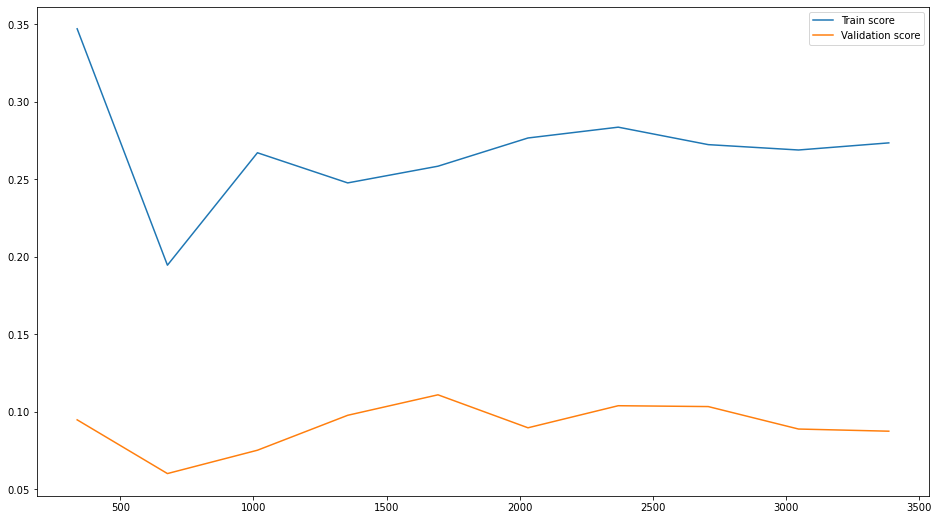

In [54]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

evaluation(model)

Bon... avoir plus de données c'est cool mais là... ça a eu l'effet inverse, donc ce n'est pas bon... Testons d'ajouter une nouvelle feature indiquant si la feature est manquante :

<ipython-input-55-c07dc0669efc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isna'] = df['Parainfluenza 3'].isna() | df['Leukocytes'].isna()


0    4077
1     438
Name: SARS-Cov-2 exam result, dtype: int64
0    1009
1     120
Name: SARS-Cov-2 exam result, dtype: int64
[[1000    9]
 [ 116    4]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1009
           1       0.31      0.03      0.06       120

    accuracy                           0.89      1129
   macro avg       0.60      0.51      0.50      1129
weighted avg       0.83      0.89      0.85      1129



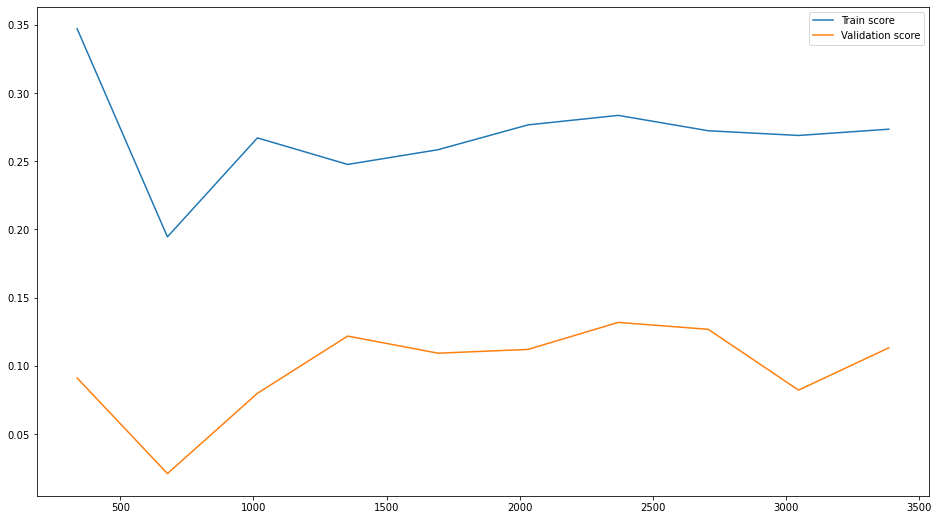

In [55]:
# Testons avec un fillna plutot qu'un dropna
def imputation(df):
    df['isna'] = df['Parainfluenza 3'].isna() | df['Leukocytes'].isna()
    return df.fillna(-10e2)

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

evaluation(model)

Bon décidémment ça ne passe pas... testons la selection de variables:

0    259
1     42
Name: SARS-Cov-2 exam result, dtype: int64
0    53
1     8
Name: SARS-Cov-2 exam result, dtype: int64
[[51  2]
 [ 5  3]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        53
           1       0.60      0.38      0.46         8

    accuracy                           0.89        61
   macro avg       0.76      0.67      0.70        61
weighted avg       0.87      0.89      0.87        61



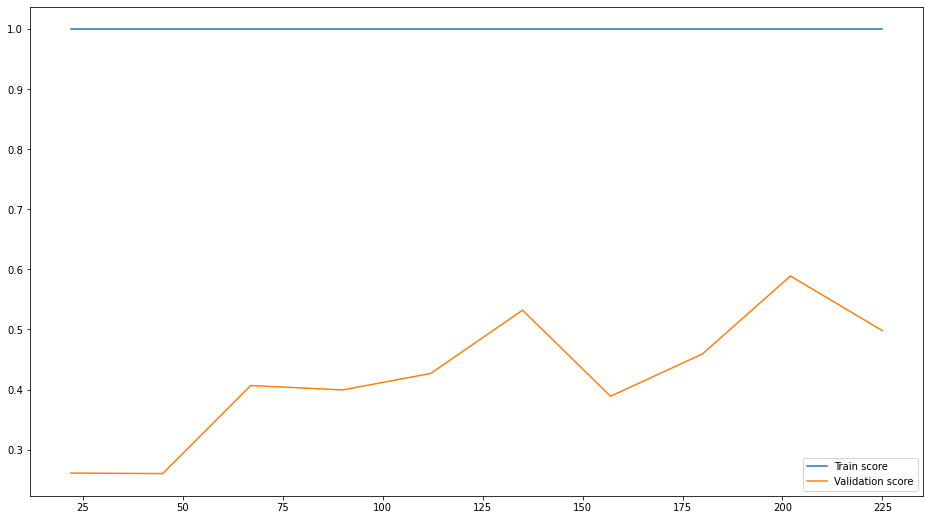

<Figure size 1152x648 with 0 Axes>

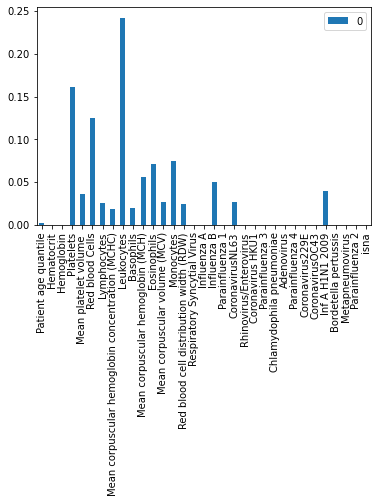

In [56]:
# Testons avec un fillna plutot qu'un dropna
def imputation(df):
    return df.dropna(axis=0)

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

evaluation(model)

# Visualisons les features d'importance
plt.figure(figsize=(16, 9))
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()
plt.show()

On voit que ce que l'on pensait être intéressant l'est selon le model, comme les Leucocytes. Essayons de trier ce qui nous intéresse du reste, notamment, supprimons les types virus et gardons seulement les types sangs :

In [57]:
# On trie les datas
df_2 = df[key_columns + blood_cols]

# On recréé les train et test sets
trainset, testset = train_test_split(df_2, test_size=.2)

# On preprocess
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

0    415
1     62
Name: SARS-Cov-2 exam result, dtype: int64
0    102
1     19
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)
<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


[[94  8]
 [10  9]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       102
           1       0.53      0.47      0.50        19

    accuracy                           0.85       121
   macro avg       0.72      0.70      0.71       121
weighted avg       0.85      0.85      0.85       121



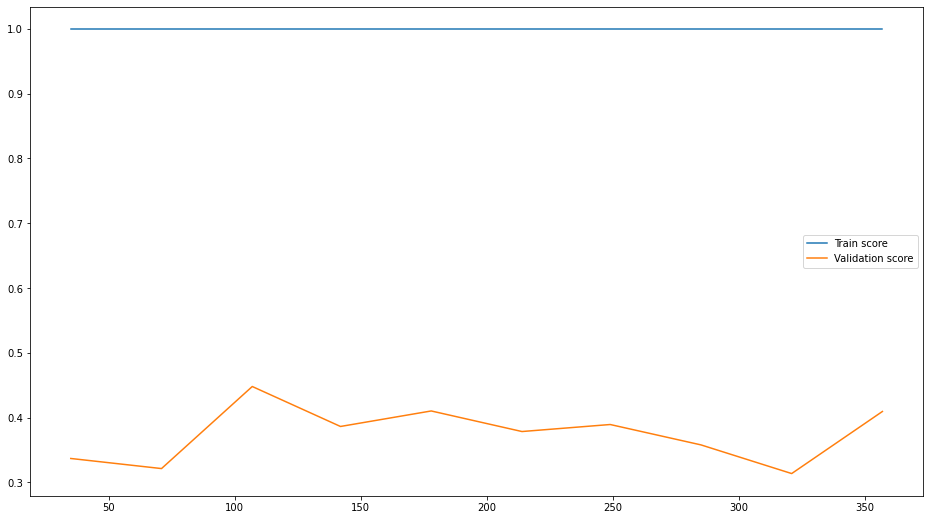

In [58]:
# Et on évalue
evaluation(model)

Bon on a toujours de l'overfitting mais c'est mieux, tentons d'utiliser un modèle régularisé comme la random forest qui lutte contre l'overfitting

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model = RandomForestClassifier(random_state=0)

<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)
<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


0    256
1     42
Name: SARS-Cov-2 exam result, dtype: int64
0    56
1     8
Name: SARS-Cov-2 exam result, dtype: int64
[[55  1]
 [ 3  5]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.83      0.62      0.71         8

    accuracy                           0.94        64
   macro avg       0.89      0.80      0.84        64
weighted avg       0.93      0.94      0.93        64



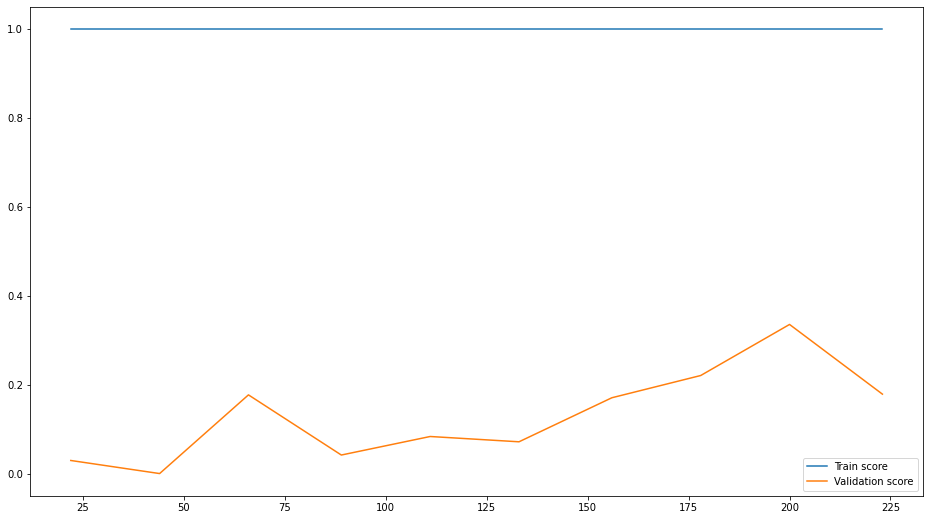

In [61]:
# On retente avec les malades
trainset, testset = train_test_split(df_1, test_size=.2)

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

evaluation(model)

<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)
<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)


0    413
1     66
Name: SARS-Cov-2 exam result, dtype: int64
0    104
1     15
Name: SARS-Cov-2 exam result, dtype: int64
[[103   1]
 [ 11   4]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       104
           1       0.80      0.27      0.40        15

    accuracy                           0.90       119
   macro avg       0.85      0.63      0.67       119
weighted avg       0.89      0.90      0.88       119



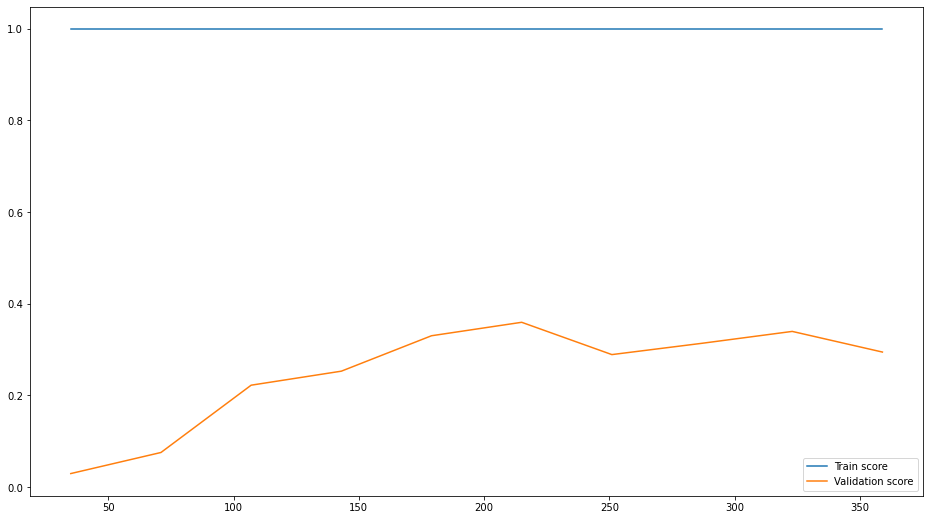

In [62]:
# On retente sans les malades
trainset, testset = train_test_split(df_2, test_size=.2)

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

evaluation(model)

Et si on remettait la variable *est malade* qui avait permit de voir des choses intéressantes, tout en supprimant toutes les autres maladies ?

In [63]:
def feature_engineering(df):
    df['est malade'] = df[viral_cols].sum(axis=1) > 0
    df = df.drop(viral_cols, axis=1)
    return df

In [64]:
# On retente sans les malades
trainset, testset = train_test_split(df_1, test_size=.2)

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)
X_train.head(2)

0    421
1     62
Name: SARS-Cov-2 exam result, dtype: int64
0    96
1    19
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(code)
<ipython-input-63-047e832c8c73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = df[viral_cols].sum(axis=1) > 0
<ipython-input-42-3add7bc75f12>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),est malade
1347,14,0.236515,0.541564,0.701083,-1.111256,0.401720,2.143581,1.239930,-0.219836,-1.140144,0.178175,0.428674,-0.434694,-1.533404,-0.271247,False
216,16,0.579844,0.416252,-0.630469,-0.999063,0.102004,-0.943933,-0.452899,-0.495332,0.387152,0.491805,-0.498393,0.807138,2.406077,-0.271247,True


[[93  3]
 [10  9]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        96
           1       0.75      0.47      0.58        19

    accuracy                           0.89       115
   macro avg       0.83      0.72      0.76       115
weighted avg       0.88      0.89      0.88       115



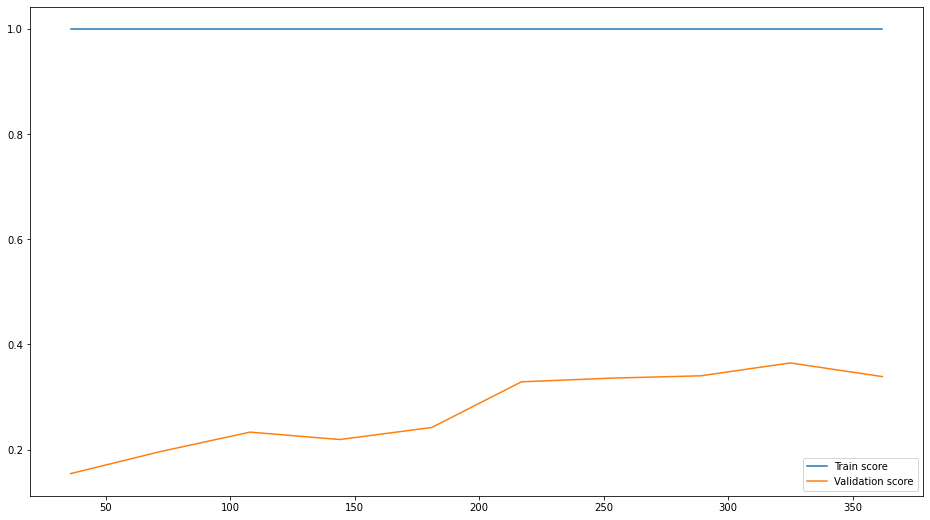

In [65]:
evaluation(model)

C'est un peu mieux mais toujours pas ça, retournons sur notre bar plot :

<Figure size 1152x648 with 0 Axes>

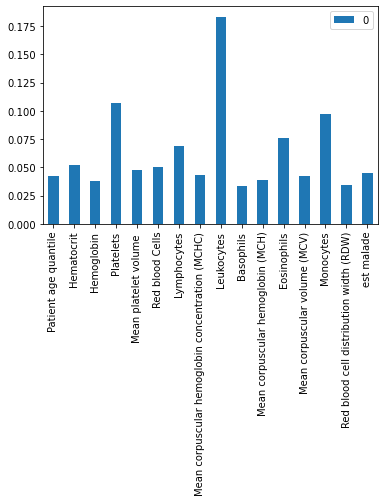

In [66]:
# Visualisons les features d'importance
plt.figure(figsize=(16, 9))
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()
plt.show()

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # Test de ANOVA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

[[91  5]
 [ 9 10]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        96
           1       0.67      0.53      0.59        19

    accuracy                           0.88       115
   macro avg       0.79      0.74      0.76       115
weighted avg       0.87      0.88      0.87       115



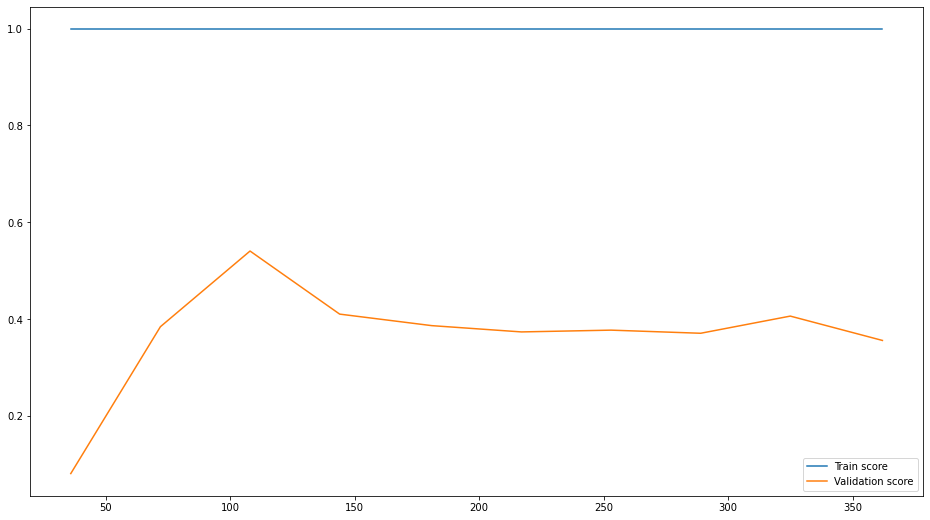

In [68]:
model = make_pipeline(
    #PolynomialFeatures(2),
    SelectKBest(f_classif, k=4),
    RandomForestClassifier(random_state=0)
)
evaluation(model)

In [69]:
preprocessor = make_pipeline(
    #PolynomialFeatures(2, include_bias=False),
    SelectKBest(f_classif, k=4)
)

In [70]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))

# Attention, ici il faudra normaliser !
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

RandomForest
[[91  5]
 [ 9 10]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        96
           1       0.67      0.53      0.59        19

    accuracy                           0.88       115
   macro avg       0.79      0.74      0.76       115
weighted avg       0.87      0.88      0.87       115



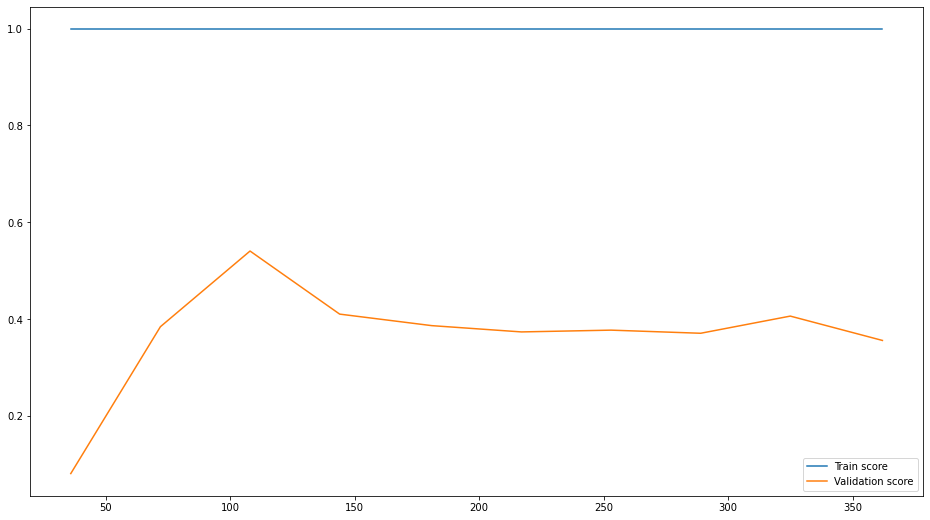

AdaBoost
[[88  8]
 [11  8]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        96
           1       0.50      0.42      0.46        19

    accuracy                           0.83       115
   macro avg       0.69      0.67      0.68       115
weighted avg       0.82      0.83      0.83       115



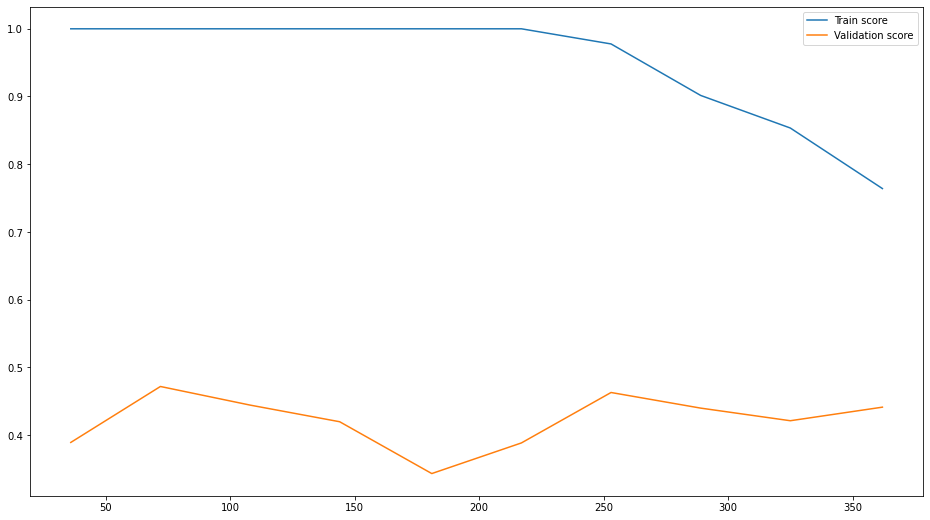

SVM
[[91  5]
 [12  7]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        96
           1       0.58      0.37      0.45        19

    accuracy                           0.85       115
   macro avg       0.73      0.66      0.68       115
weighted avg       0.83      0.85      0.84       115



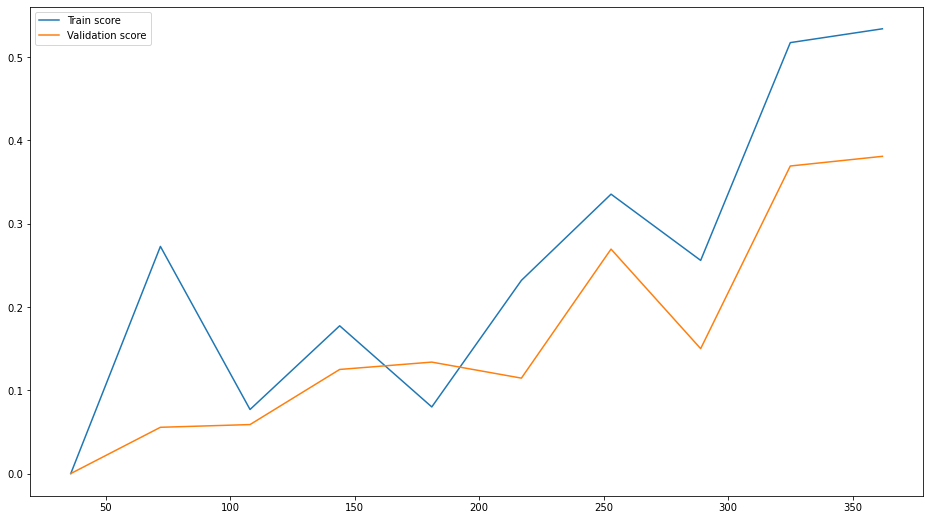

KNN
[[88  8]
 [12  7]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        96
           1       0.47      0.37      0.41        19

    accuracy                           0.83       115
   macro avg       0.67      0.64      0.65       115
weighted avg       0.81      0.83      0.82       115



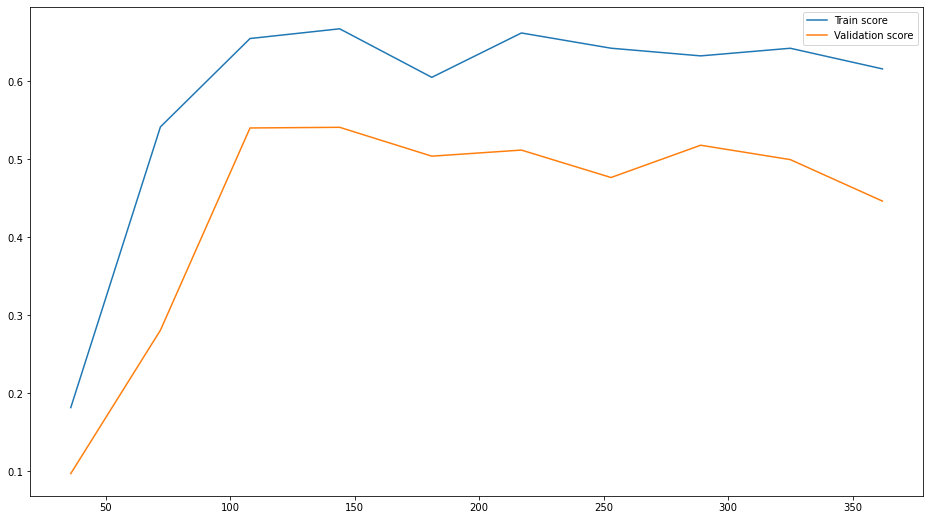

In [71]:
# Faisons une liste de modèles à tester
list_of_models = {
    'RandomForest': RandomForest,
    'AdaBoost': AdaBoost, 
    'SVM': SVM, 
    'KNN': KNN    
}

for key, model in list_of_models.items():
    print(key)
    evaluation(model)

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
AdaBoost

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest', SelectKBest(k=4))])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))])

In [74]:
# Random forest / Adaboost
hyper_params = {
    'adaboostclassifier__n_estimators': [30, 50, 90],
    'adaboostclassifier__learning_rate':[10e-3, 10e-2, 10e-1]
}

{'adaboostclassifier__learning_rate': 1.0, 'adaboostclassifier__n_estimators': 50}
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        96
           1       0.50      0.42      0.46        19

    accuracy                           0.83       115
   macro avg       0.69      0.67      0.68       115
weighted avg       0.82      0.83      0.83       115

[[88  8]
 [11  8]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        96
           1       0.50      0.42      0.46        19

    accuracy                           0.83       115
   macro avg       0.69      0.67      0.68       115
weighted avg       0.82      0.83      0.83       115



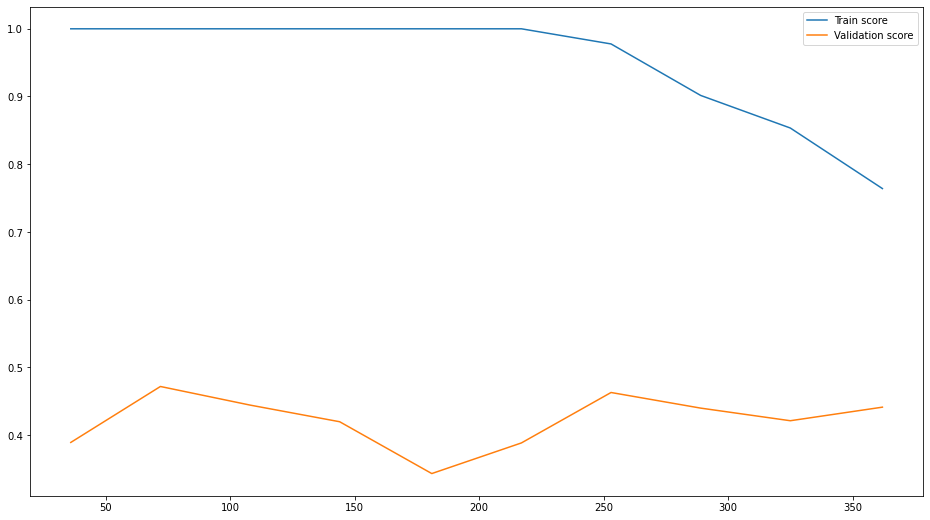

In [76]:
# On cherche à minimuser le recall, faux négatifs
grid = GridSearchCV(AdaBoost, hyper_params, scoring='recall', cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

evaluation(grid.best_estimator_)

In [77]:
hyper_params = {
    'randomforestclassifier__n_estimators': [100, 1000, 10000]
}

{'randomforestclassifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        96
           1       0.67      0.53      0.59        19

    accuracy                           0.88       115
   macro avg       0.79      0.74      0.76       115
weighted avg       0.87      0.88      0.87       115

[[91  5]
 [ 9 10]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        96
           1       0.67      0.53      0.59        19

    accuracy                           0.88       115
   macro avg       0.79      0.74      0.76       115
weighted avg       0.87      0.88      0.87       115



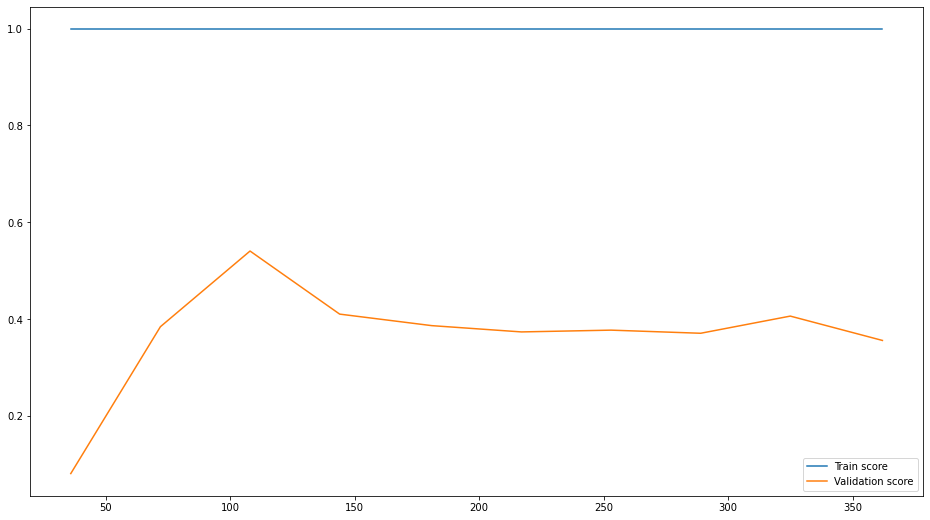

In [79]:
# On cherche à minimuser le recall, faux négatifs
grid = GridSearchCV(RandomForest, hyper_params, scoring='recall', cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

evaluation(grid.best_estimator_)

Bon, on pourrait encore tester longtemps mais plutot que de tout tester dans une grid immense qui met 10 ans à calculer, utilisons RandomizedSearchCV. On va mettre pleins de config et on testera au hazard différentes configurations, et on recentrera vers ce qui semble être le mieux.

In [87]:
from sklearn.model_selection import RandomizedSearchCV

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\pipeline.py", line 376, in fit_t

{'svc__gamma': 0.01, 'svc__C': 1000, 'pipeline__selectkbest__k': 9}
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        96
           1       0.52      0.68      0.59        19

    accuracy                           0.84       115
   macro avg       0.73      0.78      0.75       115
weighted avg       0.87      0.84      0.85       115

[[84 12]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        96
           1       0.52      0.68      0.59        19

    accuracy                           0.84       115
   macro avg       0.73      0.78      0.75       115
weighted avg       0.87      0.84      0.85       115



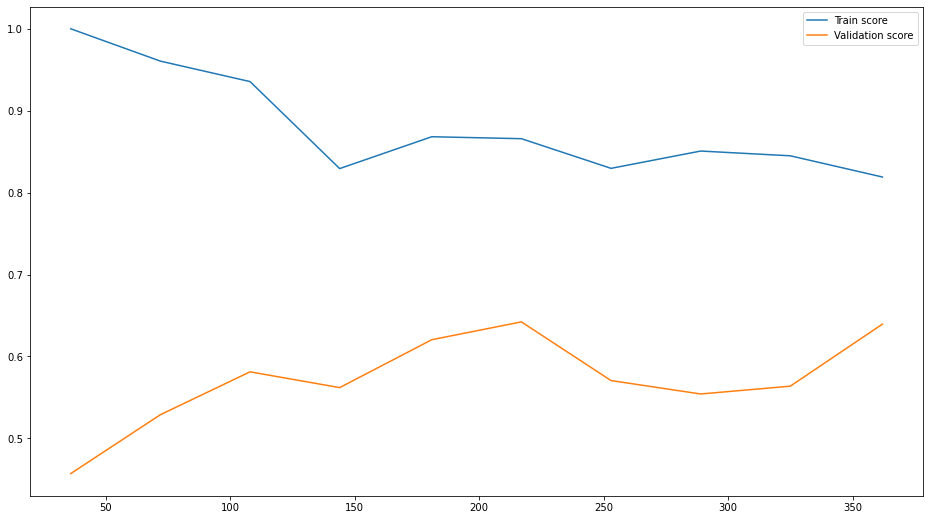

In [127]:
hyper_params = {
    'svc__C': [1, 10, 100, 1000, 10000],
    'svc__gamma':[10e-4, 10e-3, 10e-2],
    'pipeline__selectkbest__k': range(4, 20)
}

grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=5, n_iter=100)
grid.fit(X_train, y_train)
print(grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

evaluation(grid.best_estimator_)

Regardons le seuil de décision avec la **Précision Recall Curve** 

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
precision, recall, threshold = precision_recall_curve(y_test, 
                                grid.best_estimator_.decision_function(X_test))

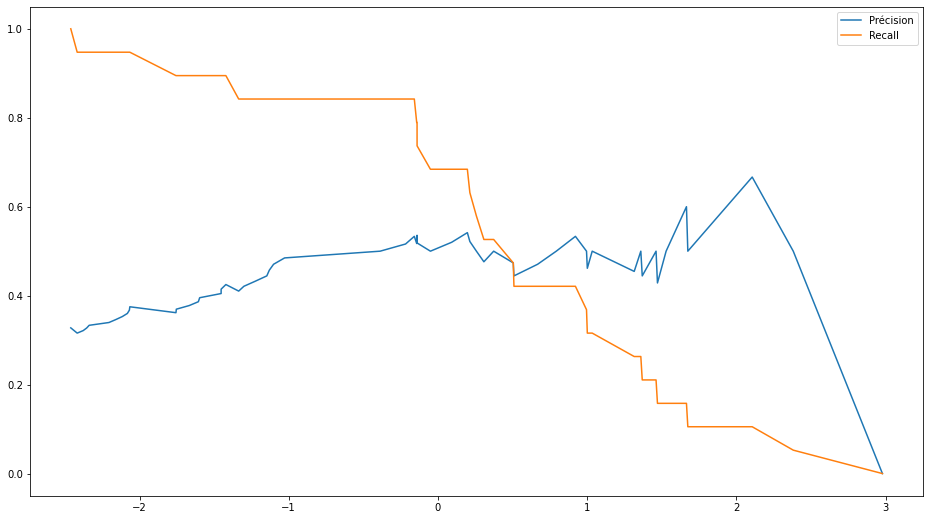

In [130]:
plt.figure(figsize=(16, 9))
plt.plot(threshold, precision[:-1], label='Précision')
plt.plot(threshold, recall[:-1], label='Recall')
plt.legend()
plt.show()

Il faut trouver un bon compromis afin d'avoir le meilleur recall (tous les contaminés trouvés) et la meilleur précision (tous les contaminés trouvés mais sans faux positifs)

In [133]:
from sklearn.metrics import recall_score

In [131]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [141]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=.1)

print(f'Score f1 du modèle : {(f1_score(y_test, y_pred))}\nRecall : {recall_score(y_test, y_pred)}')

Score f1 du modèle : 0.6046511627906976
Recall : 0.6842105263157895


on a un score f1 et un recall pas mauvais bien que pas très précis.

[Back to top](#top)

---

# 4. Modelling<a id="chap4covid"></a>

[Back to top](#top)

---

# Conclusion<a id="cclcovid"></a>

[Back to top](#top)

---

Thibault **Santonja**

2021